# Second Hand Car Price Prediction

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
sample_submission=pd.read_csv('Sample Submission-1.csv')
sample_submission.head()

,Unique Id,Price
0,11001,375147.00
1,11002,1193368.50
2,11003,1523871.00
3,11004,2180268.00
4,11005,2704149.75


In [3]:
train_data = pd.read_csv('Training Data Set.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [5]:
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [6]:
train_data.tail()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4,5,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5,5,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4,5,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,None,None,diesel,874352.25
53514,78515,bmw,x5,Kochi,142000.0,First,2008,11,2993,173.0,NaN,4,auto,5,5,diesel,1576610.25


In [7]:
train_data.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [8]:
train_data.shape

(53515, 17)

In [9]:
# Looking ate the unique values of Categorical Features
print(train_data['Location'].unique())
print(train_data['fuel_type'].unique())
print(train_data['transmission'].unique())
print(train_data['Owner Type'].unique())

#Rest Feature are worked for Feature Engineering

['Ahmedabad' 'Hyderabad' 'Mumbai' 'Jaipur' 'Chennai' 'Coimbatore' 'Kochi'
 'Bangalore' 'Pune' 'Kolkata' 'Delhi']
['petrol' 'diesel']
['man' 'auto']
['Second' 'Third' 'Fourth & Above' 'First']


In [10]:
train_data.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

The columns Distance,Engine power and body type have null values. Lets do the imputation.

In [11]:
train_data.shape

(53515, 17)

## Null Value Imputation:

In [12]:
train_data['Distance '] = train_data['Distance '].replace(np.nan, train_data['Distance '].median())

In [13]:
train_data['Distance '].values

array([  65520.,   27750.,   46000., ...,   25500., 1195500.,  142000.])

In [14]:
train_data['engine_power'] = train_data['engine_power'].replace(np.nan, train_data['engine_power'].median())

In [15]:
train_data['body_type'] = train_data['body_type'].replace(np.nan,'compact')

In [16]:
train_data['door_count'] = train_data['door_count'].replace('None',4)

In [17]:
train_data['seat_count'] = train_data['seat_count'].replace('None',5)

In [18]:
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


# Feautre Engineering 🛠
There are many different data which could be extarcted from present. And, that's where Feature Engineering comes.

In [19]:
train_data['engine_power']

0        147.0
1         51.0
2        105.0
3        140.0
4        180.0
         ...  
53510     77.0
53511     77.0
53512    105.0
53513     93.0
53514    173.0
Name: engine_power, Length: 53515, dtype: float64

In [20]:
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


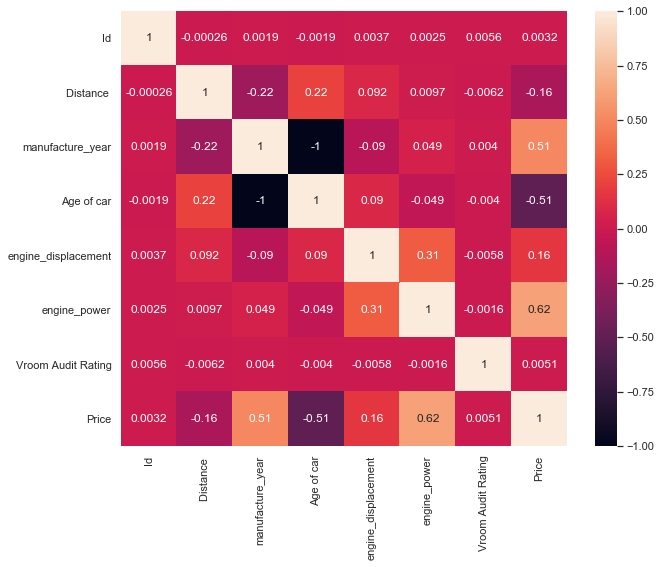

In [21]:
axes,fig=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(train_data.corr(),annot=True)

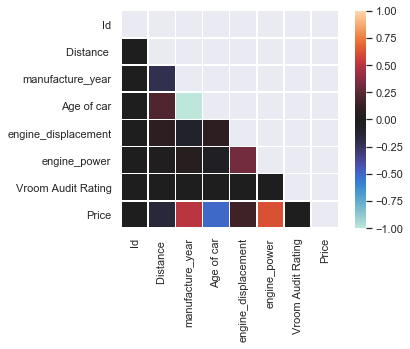

In [22]:
corr = train_data.corr()
# Generate a mask for the upper right triangle of the square - one half is enough to convey the correlation 
## between the predictors
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate the correlation plot 
sns.heatmap(corr, mask=mask, center=0, square=True, linewidths=.5)

plt.show()

Age of car and manufacture year are correlated to each other and have good correlation with the target too, even engine power has good correlation with the target variable.

# Data Visualization
### Let's Plot some
Data visualization is the best way to find out how a data looks like

In [23]:
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,Second,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


In [24]:
train_data.shape

(53515, 17)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             53515 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         53515 non-null  float64
 10  body_type            53515 non-null  object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [26]:
train_data['Price'].describe()

count    5.351500e+04
mean     1.098084e+06
std      8.441565e+05
min      3.000000e+00
25%      5.051812e+05
50%      8.854552e+05
75%      1.477829e+06
max      2.212078e+07
Name: Price, dtype: float64

### Price

First let's have a look over our target column

(0, 22120775.25)

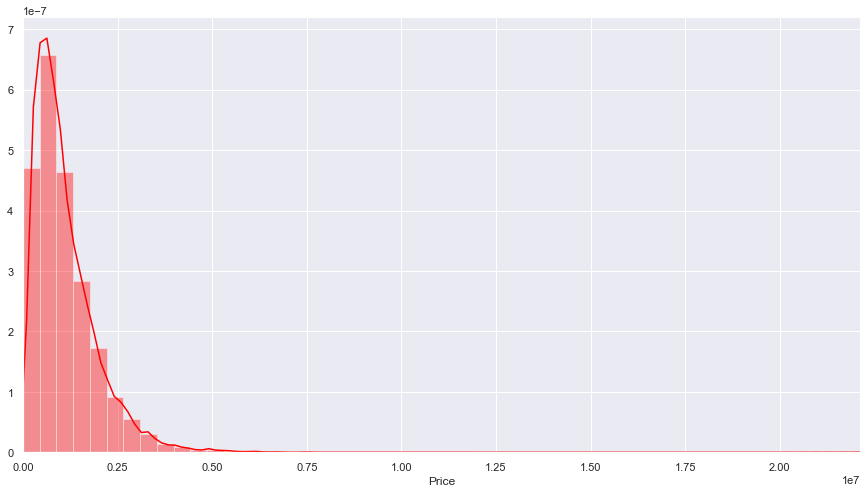

In [27]:
sns.set(style="darkgrid")
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'],color='red')
plt.xlim([0,22120775.25])

### Fuel Type

In [28]:
train_data['fuel_type'].describe()

count      53515
unique         2
top       diesel
freq       27559
Name: fuel_type, dtype: object

most cars are petrol fuelled.

Price of diesel cars is higher compared to the price of the Petrol cars.

In [29]:
train_data['Price'].max()

22120775.25

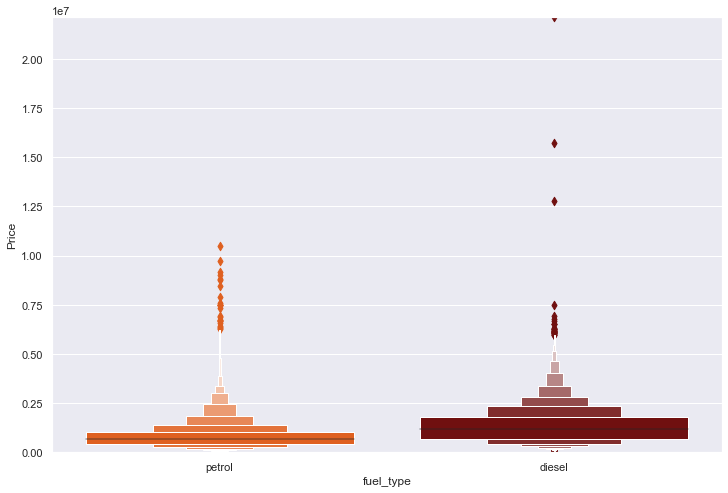

In [30]:
var = 'fuel_type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxenplot(x=var, y="Price", data=data,palette='gist_heat_r')
fig.axis(ymin=0, ymax=22120775.25);

The cars that run on diesel have higher prices than the cars that run on petrol

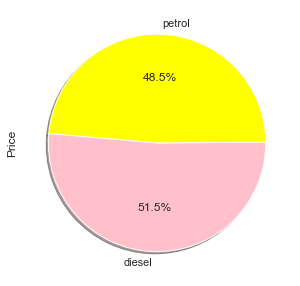

In [31]:
plt.subplots(figsize=(5,5))
a=train_data.groupby(["fuel_type"])['Price'].count()
colors = ['pink', 'yellow']

a.plot.pie(colors=colors,autopct='%1.1f%%',shadow=True, startangle=175)

51.5% are Diesel car prices,
48.5% is the Petrol car prices.

### Year

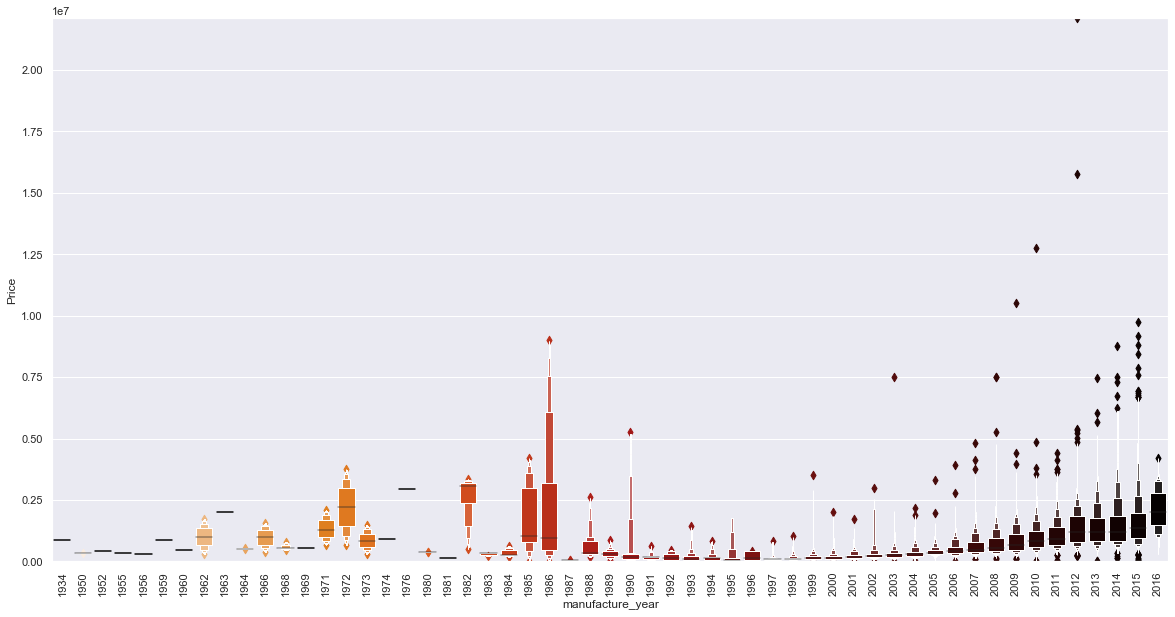

In [32]:
var = 'manufacture_year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxenplot(x=var, y="Price", data=data,palette='gist_heat_r')
fig.axis(ymin=0, ymax=22120775.25);
plt.xticks(rotation=90)
plt.show()

### Owner Type

In [33]:
train_data['Owner Type'].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

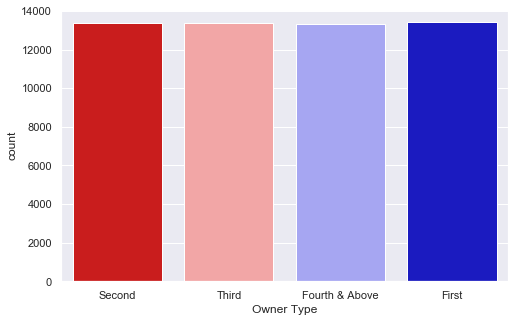

In [34]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(train_data['Owner Type'],palette='seismic_r')

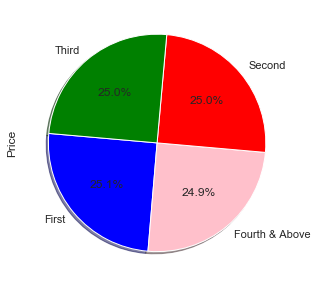

In [35]:
plt.subplots(figsize=(5,5))
a=train_data.groupby(["Owner Type"])['Price'].count()
colors = ['blue', 'pink','red', 'green']

a.plot.pie(colors=colors,autopct='%1.1f%%',shadow=True, startangle=175)

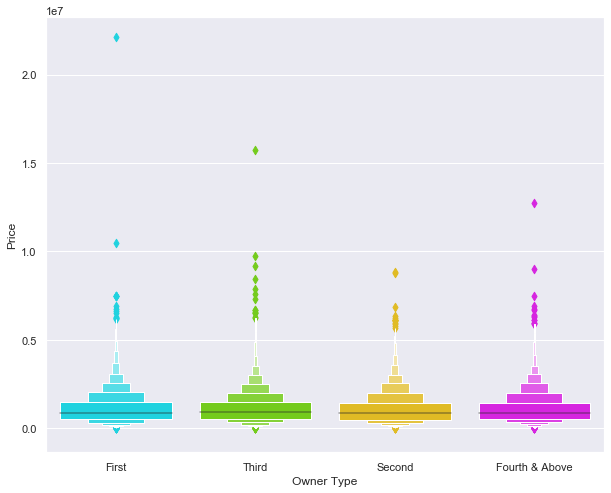

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

sns.boxenplot(x ='Owner Type', y='Price',ax=ax,data=train_data,palette='gist_ncar',order=train_data['Owner Type'].value_counts().index)

It is interesting to note that the first hand sellers received the best price for their car. However,the ones to recieve the next best resale value were Third hand sellers,Second hand sellers and Fourth and above sellers.

    Made a Strip plot for clearer view:

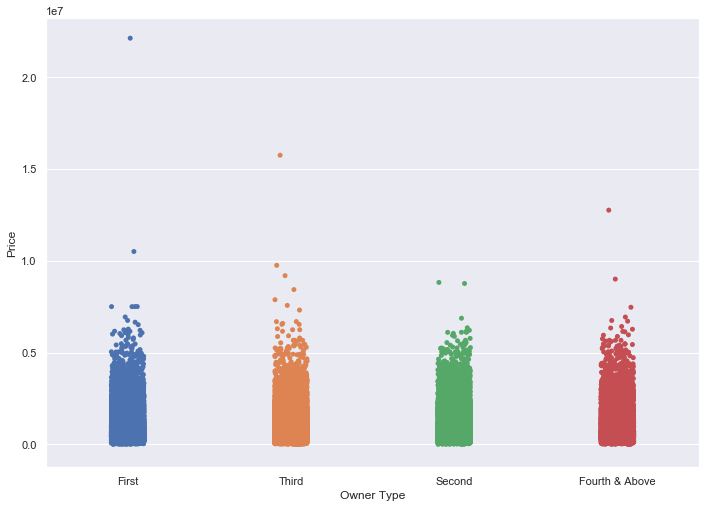

In [37]:
var = 'Owner Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data,order=train_data['Owner Type'].value_counts().index)

*Even the stripplots give us the same information*

### Makers:

<Figure size 1440x720 with 0 Axes>

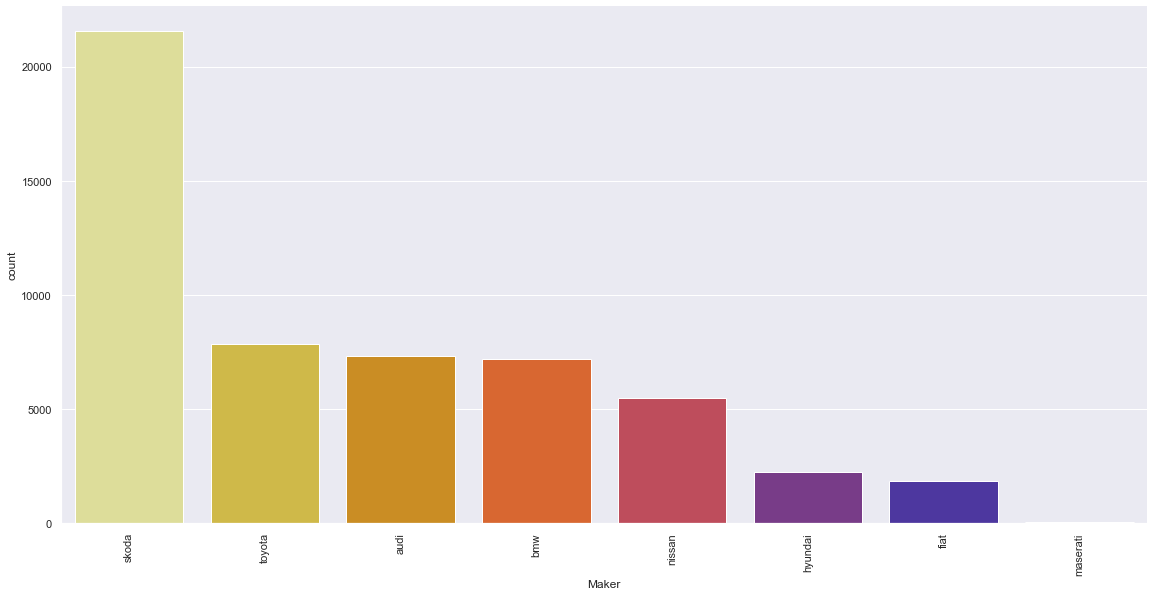

In [38]:
var = "Maker"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count",palette="CMRmap_r", height=8, aspect=2, data=train_data,order=train_data['Maker'].value_counts().index);
plt.xticks(rotation=90);

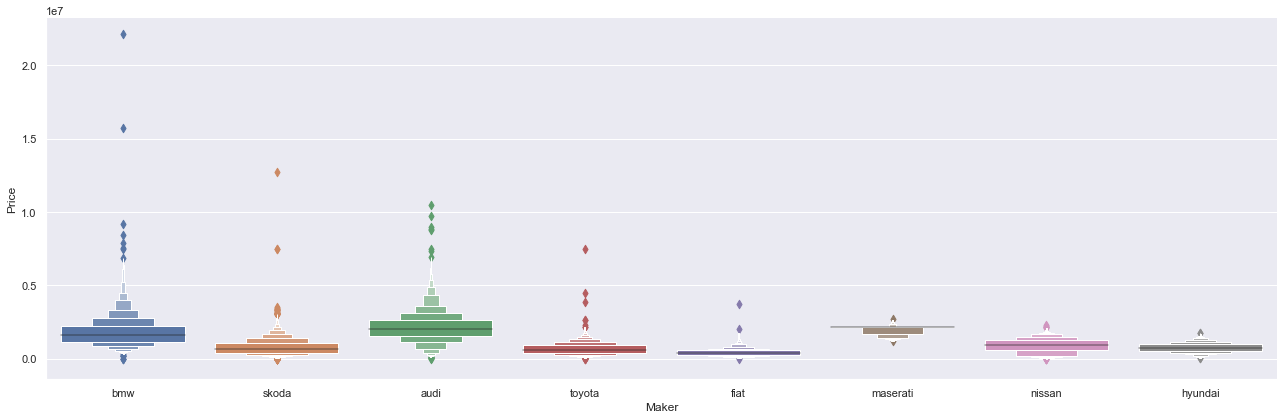

In [39]:
sns.catplot(y='Price',x='Maker',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

*Skoda is the most common maker in this used car data, followed by toyota*

*bmw is the most priced maker,followed by skoda and Audi*

### Model

<Figure size 1440x720 with 0 Axes>

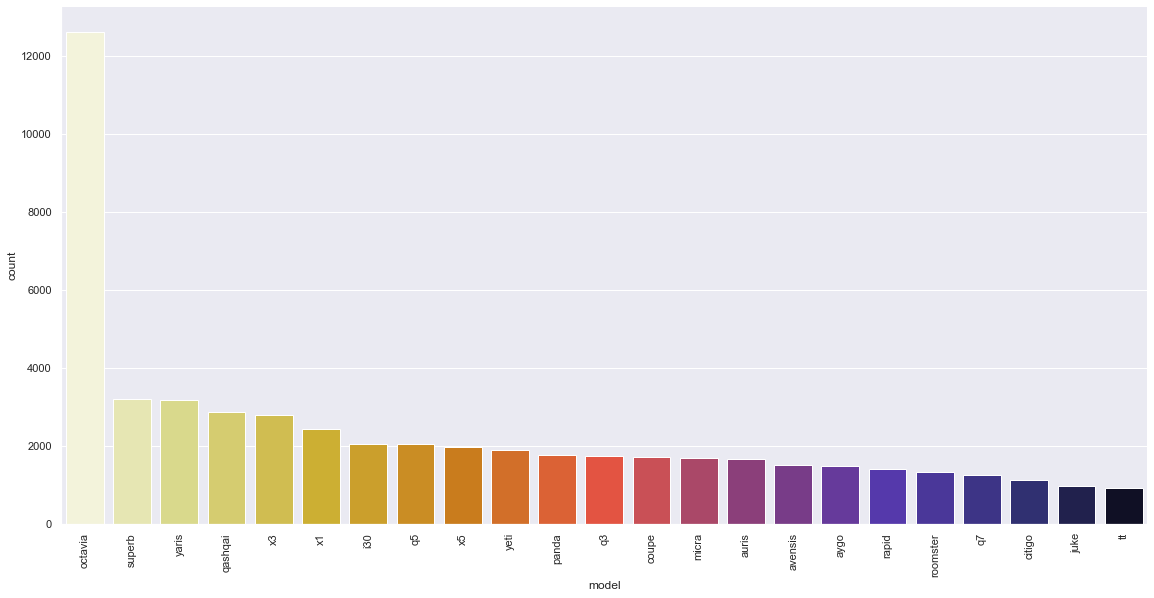

In [40]:
var = "model"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count",palette="CMRmap_r", height=8, aspect=2, data=train_data,order=train_data['model'].value_counts().index);
plt.xticks(rotation=90);

*Octavia is the most common model, followed by Superb*

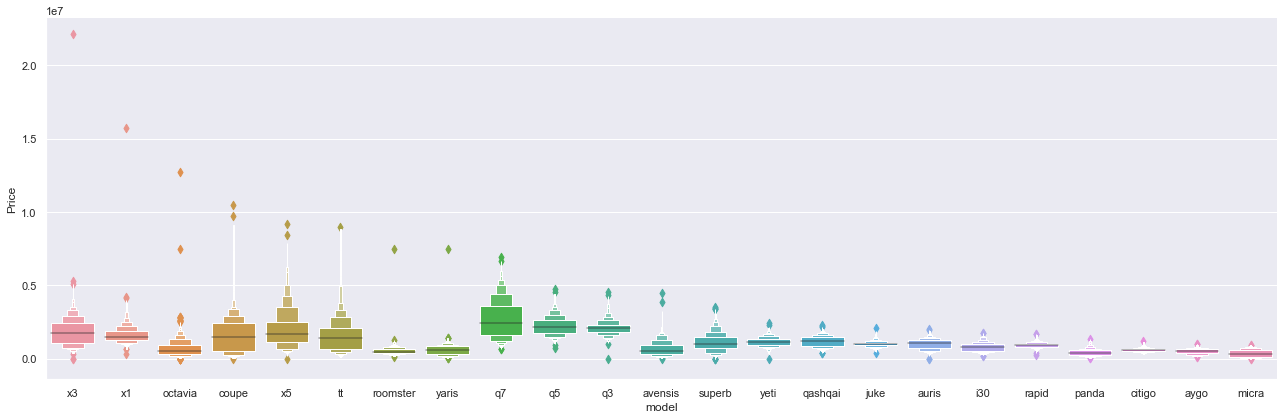

In [41]:
sns.catplot(y='Price',x='model',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

*Most priced Second hand models of car:BMW(X3),BMW(X1),Skoda(Octavia)*

### Location

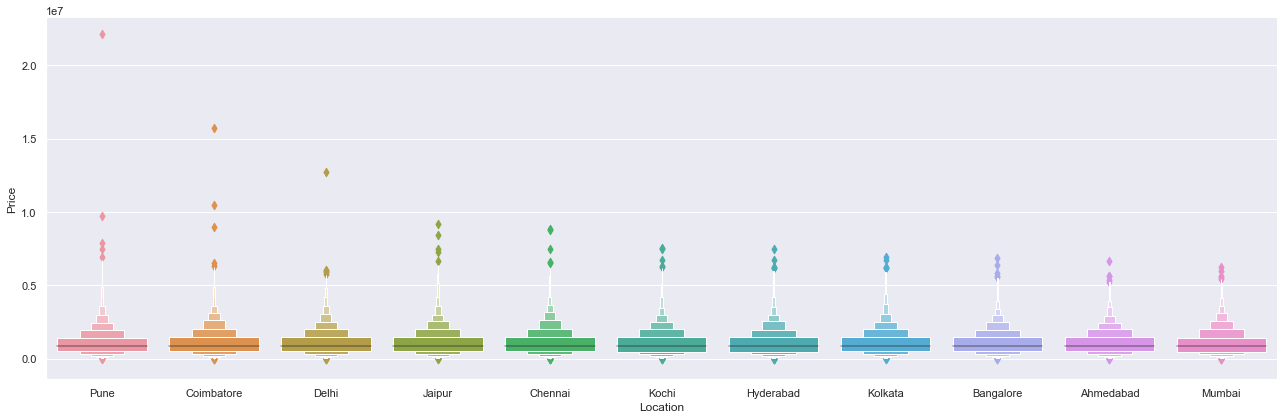

In [42]:
sns.catplot(y='Price',x='Location',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show()

*Locations that recorded the highest price for the used cars are Pune and Coimbatore*

### Transmission

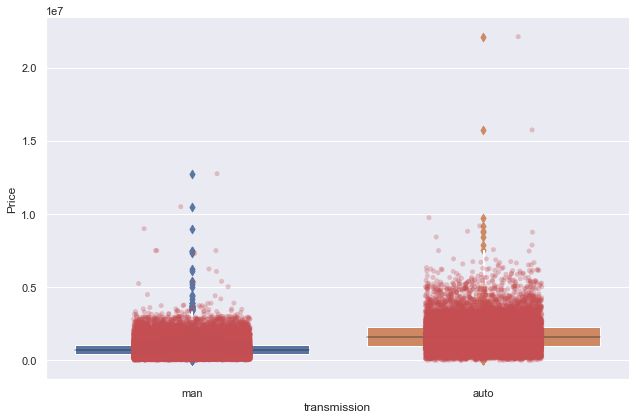

In [43]:
sns.catplot(x='transmission', y='Price', kind="boxen",  data=train_data, height=6,aspect=1.5)
# add data points to boxplot with stripplot
sns.stripplot(x='transmission', y='Price', data=train_data, alpha=0.3,jitter=0.2,color='r');

*The cars that were automatic were priced more than manual ones*

### Body type

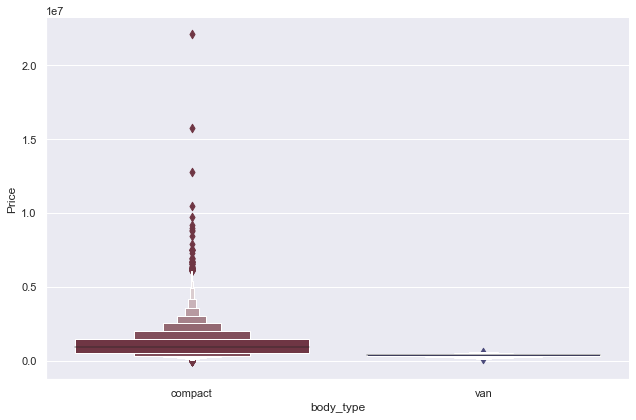

In [44]:
sns.catplot(x='body_type', y='Price', kind="boxen",  data=train_data, height=6,aspect=1.5,palette="icefire_r")

*Prices were most for the compact body type car*

### Door count

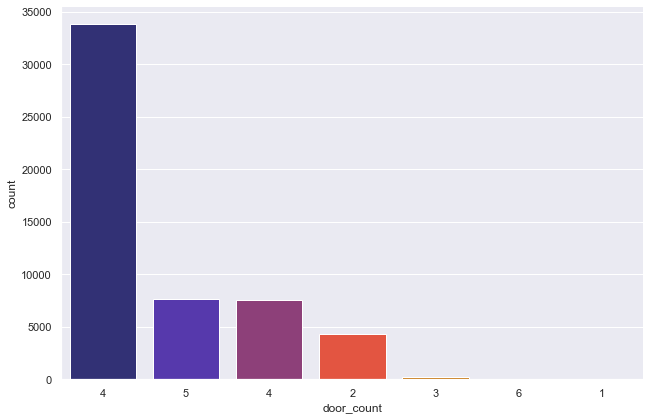

In [45]:
sns.catplot(x='door_count', kind="count",data=train_data, height=6,aspect=1.5,palette="CMRmap",order=train_data['door_count'].value_counts().index)

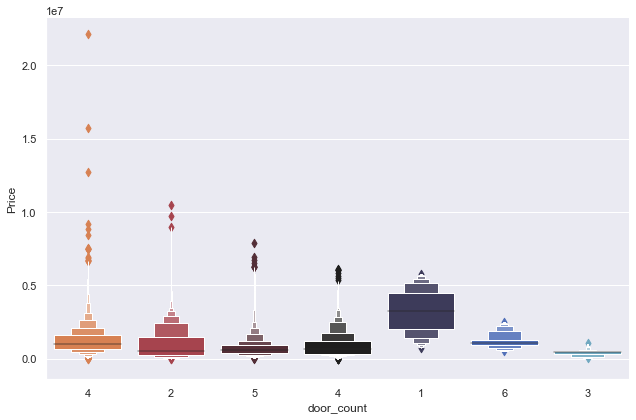

In [46]:
sns.catplot(x='door_count', y='Price', kind="boxen",data= train_data.sort_values('Price',ascending=False), height=6,aspect=1.5,palette="icefire_r")

*Cars that were having 4 doors,2 doors and 5 doors made good money to their owners*

### Seat Count

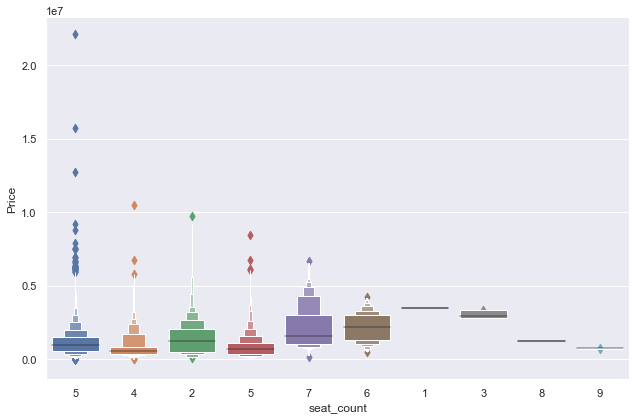

In [47]:
sns.catplot(x='seat_count', y='Price', 
            data= train_data.sort_values('Price',ascending=False),height=6,
                aspect=1.5,
           kind='boxen')


*5 seater second hand cars were priced the most,followed by four seaters*

# Working with Categorical Data

As for now we have left with only 5 categorical features:
1. Location
2. Fuel_Type
3. Transmission
4. Owner_Type
5. Maker
6. body type
7. door count
6. Seat Count

For handling categorical data. We mostly use these two forms of feature encoding:
1. OneHotEncoder
2. LabelEncoder

Where OneHotEncoder is used where data are not in any order and LabelEncoder when data is in order.



### Working for Location

In [48]:
var = 'Location'
train_data[var].value_counts()

Coimbatore    4976
Kochi         4969
Bangalore     4878
Jaipur        4870
Kolkata       4868
Pune          4862
Mumbai        4860
Chennai       4834
Delhi         4824
Hyderabad     4804
Ahmedabad     4770
Name: Location, dtype: int64

We will be using One-hot-encoding here

In [49]:
Location = train_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
53510,0,0,0,1,0,0,0,0,0,0
53511,1,0,0,0,0,0,0,0,0,0
53512,0,0,0,0,0,0,0,0,0,1
53513,0,0,0,0,0,1,0,0,0,0


### Working for Fuel_Type

In [50]:
var = 'fuel_type'
train_data[var].value_counts()

diesel    27559
petrol    25956
Name: fuel_type, dtype: int64

Again we will be using One-hot-encoding

In [51]:
Fuel_type = train_data[[var]]
Fuel_type = pd.get_dummies(Fuel_type,drop_first=True)
Fuel_type.head()

,fuel_type_petrol
0,1
1,1
2,0
3,1
4,0


### Working with Transmission

In [52]:
var = 'transmission'
train_data[var].value_counts()

man     36734
auto    16781
Name: transmission, dtype: int64

No, order so One-hot-encoding

In [53]:
transmission = train_data[[var]]
transmission = pd.get_dummies(transmission,drop_first=True)
transmission.head()

,transmission_man
0,1
1,1
2,0
3,1
4,0


### Working with Owner_Type

In [54]:
var = 'Owner Type'
train_data[var].value_counts()

First             13406
Third             13395
Second            13365
Fourth & Above    13349
Name: Owner Type, dtype: int64

As Owner_Type column has ordered data so we will be using **Label Encoding** 
**Finally**

In [55]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,65520.0,2,1964,55,1964,147.0,compact,8,man,4,5,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,3,2012,7,1242,51.0,compact,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,3,2014,5,1995,105.0,compact,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,3,2011,8,1618,140.0,compact,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,4,2012,7,2993,180.0,compact,7,auto,4,5,diesel,3085561.50


### Working with Company

In [56]:
var = 'Maker'
train_data[var].value_counts()

skoda       21563
toyota       7840
audi         7326
bmw          7178
nissan       5485
hyundai      2240
fiat         1845
maserati       38
Name: Maker, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

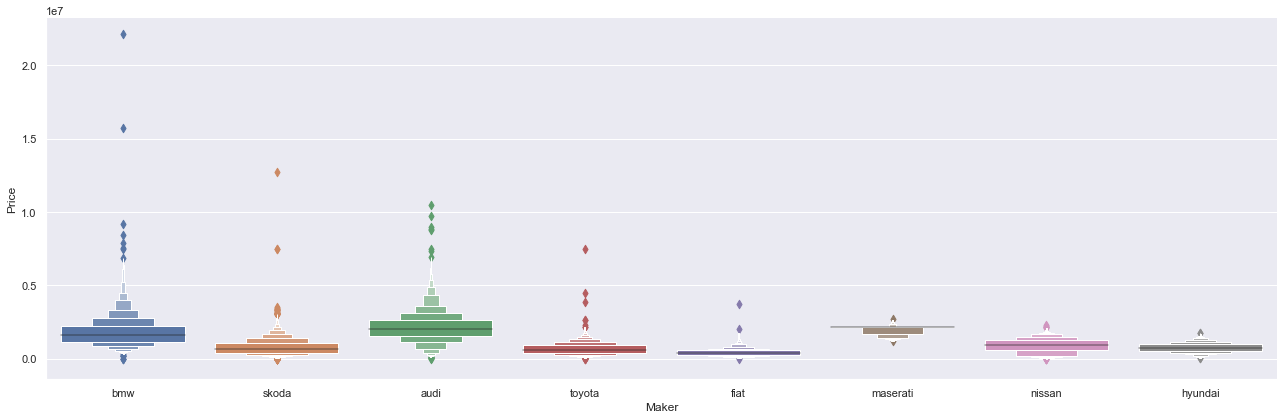

In [57]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [58]:
make= train_data[[var]]
make = pd.get_dummies(make,drop_first=True)
make.head()

,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


# body type:

In [59]:
var = 'body_type'
train_data[var].value_counts()

compact    53506
van            9
Name: body_type, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

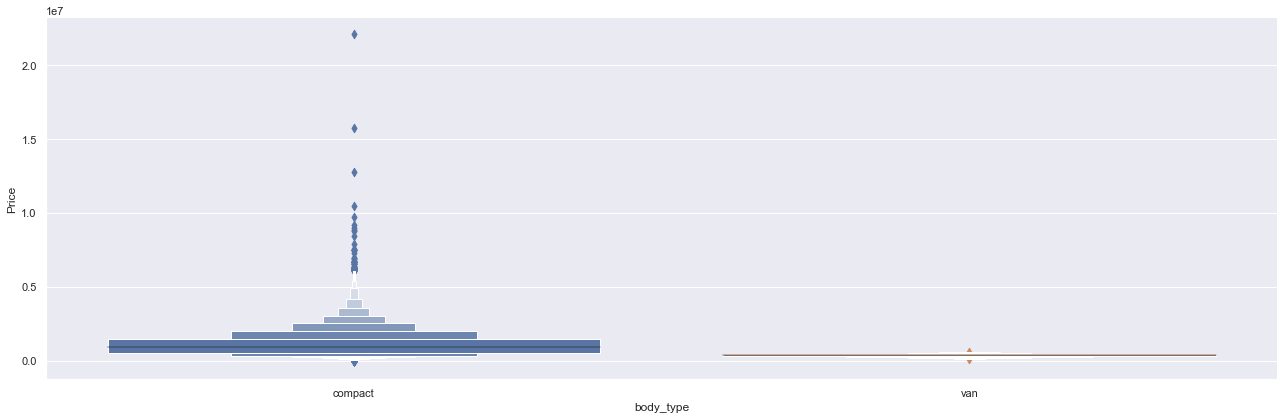

In [60]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Compact is more in demand

In [61]:
bt= train_data[[var]]
bt = pd.get_dummies(bt,drop_first=True)
bt.head()

,body_type_van
0,0
1,0
2,0
3,0
4,0


# door_count

In [62]:
var ='door_count'
train_data[var].value_counts()
train_data[var].value_counts()

4    33808
5     7630
4     7534
2     4348
3      185
6        8
1        2
Name: door_count, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

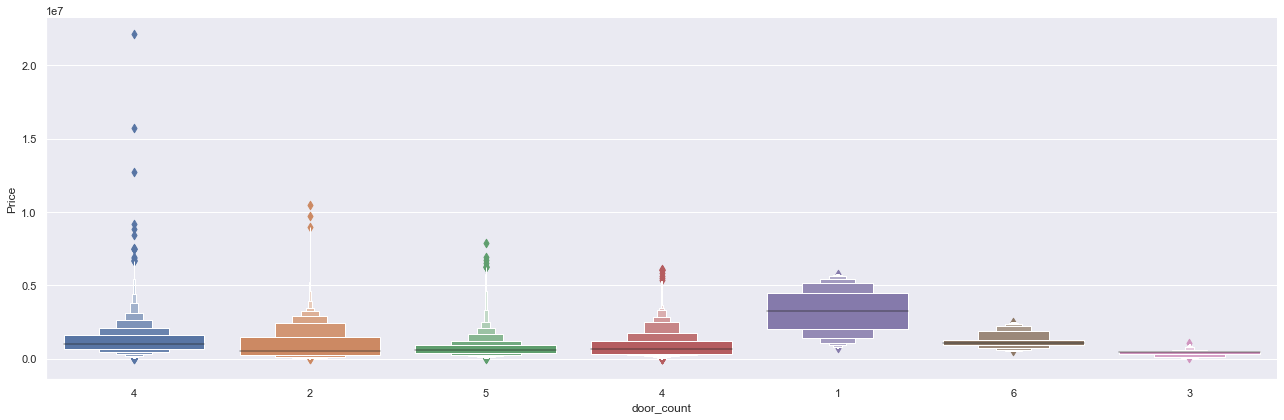

In [63]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [64]:
dc = train_data[[var]]
dc = pd.get_dummies(dc,drop_first=True)
dc.head()

,door_count_1,door_count_2,door_count_3,door_count_4,door_count_5,door_count_6
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


# Seat_count

In [65]:
var ='seat_count'
train_data[var].value_counts()
train_data[var].value_counts()

5    38824
5     8511
4     4467
7      852
2      725
3      109
6       23
9        2
8        1
1        1
Name: seat_count, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

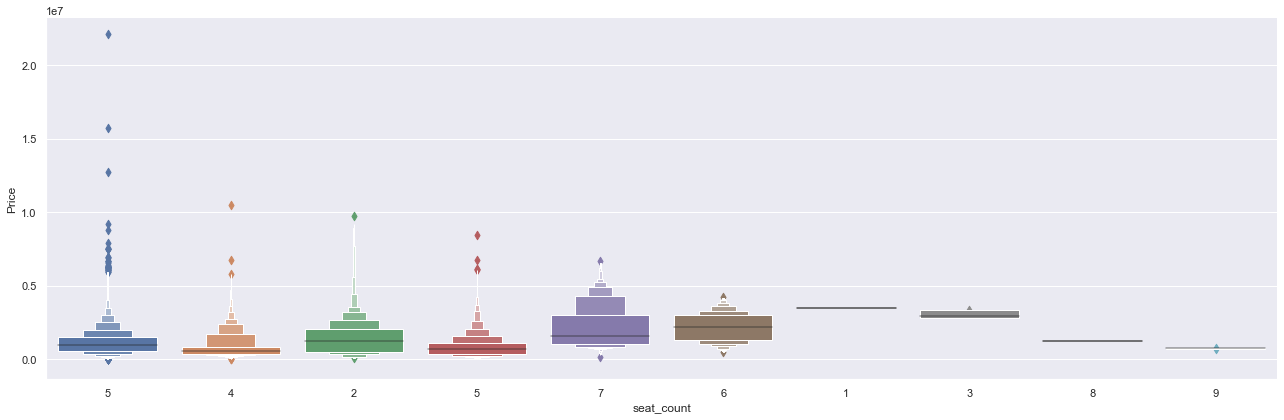

In [66]:
# Plot Company vs Price
# Yes we did this earlier... but used here for the work required here
sns.catplot(y='Price',x=var,data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [67]:
sc = train_data[[var]]
sc = pd.get_dummies(sc,drop_first=True)
sc.head()

,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [68]:
v='model'
model = train_data[[v]]
model = pd.get_dummies(model,drop_first=True)
model.head()

,model_avensis,model_aygo,model_citigo,model_coupe,model_i30,model_juke,model_micra,model_octavia,model_panda,model_q3,...,model_qashqai,model_rapid,model_roomster,model_superb,model_tt,model_x1,model_x3,model_x5,model_yaris,model_yeti
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [69]:
final_train= pd.concat([train_data,Location,Fuel_type,transmission,make,model,bt,dc,sc],axis=1)
final_train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,...,door_count_6,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,25001,skoda,octavia,Ahmedabad,65520.0,2,1964,55,1964,147.0,...,0,0,0,0,0,0,0,0,0,0
1,25002,fiat,panda,Ahmedabad,27750.0,3,2012,7,1242,51.0,...,0,0,0,0,1,0,0,0,0,0
2,25003,bmw,x1,Hyderabad,46000.0,3,2014,5,1995,105.0,...,0,0,0,0,0,1,0,0,0,0
3,25004,nissan,juke,Mumbai,43949.0,3,2011,8,1618,140.0,...,0,0,0,0,0,1,0,0,0,0
4,25005,bmw,x5,Jaipur,59524.0,4,2012,7,2993,180.0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
final_train.drop(["Location",'Maker','model',"fuel_type","transmission","door_count","seat_count","body_type"],axis=1,inplace=True)
final_train.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,door_count_6,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,25001,65520.0,2,1964,55,1964,147.0,8,543764.25,0,...,0,0,0,0,0,0,0,0,0,0
1,25002,27750.0,3,2012,7,1242,51.0,6,401819.25,0,...,0,0,0,0,1,0,0,0,0,0
2,25003,46000.0,3,2014,5,1995,105.0,7,2392855.50,0,...,0,0,0,0,0,1,0,0,0,0
3,25004,43949.0,3,2011,8,1618,140.0,7,958606.50,0,...,0,0,0,0,0,1,0,0,0,0
4,25005,59524.0,4,2012,7,2993,180.0,7,3085561.50,0,...,0,0,0,0,0,1,0,0,0,0


In [71]:
final_train.columns

Index(['Id', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'fuel_type_petrol', 'transmission_man', 'Maker_bmw',
       'Maker_fiat', 'Maker_hyundai', 'Maker_maserati', 'Maker_nissan',
       'Maker_skoda', 'Maker_toyota', 'model_avensis', 'model_aygo',
       'model_citigo', 'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'body_type_van', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_

# Test data:

In [72]:
test_data=pd.read_csv("Test Data Set.csv")
test_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2,None,petrol


In [73]:
test_data['Distance '] = test_data['Distance '].replace(np.nan, test_data['Distance '].median())

In [74]:
test_data['engine_power'] = test_data['engine_power'].replace(np.nan, test_data['engine_power'].median())

In [75]:
test_data['body_type']=test_data['body_type'].replace(np.nan,'compact')

In [76]:
test_data['door_count'] = test_data['door_count'].replace('None',4)

In [77]:
test_data['seat_count'] = test_data['seat_count'].replace('None',5)

In [78]:
var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [79]:
var = 'fuel_type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,fuel_type_petrol
0,1
1,0
2,0
3,0
4,1


In [80]:
var = 'transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,transmission_man
0,1
1,1
2,1
3,0
4,0


In [81]:
var='seat_count'
sc = train_data[[var]]
sc = pd.get_dummies(sc,drop_first=True)
sc.head()

,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9
0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [82]:
var='door_count'
dc = train_data[[var]]
dc = pd.get_dummies(dc,drop_first=True)
dc.head()

,door_count_1,door_count_2,door_count_3,door_count_4,door_count_5,door_count_6
0,0,0,0,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [83]:
var='body_type'
bt = train_data[[var]]
bt = pd.get_dummies(bt,drop_first=True)
bt.head()

,body_type_van
0,0
1,0
2,0
3,0
4,0


In [84]:
test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,1,2007,12,1595,75.0,compact,5,man,4,5,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,3,2014,5,1598,77.0,compact,4,man,4,5,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,2,2014,5,1968,110.0,compact,5,man,5,5,diesel
3,11004,audi,q3,Delhi,8650.0,4,2015,4,1968,110.0,compact,8,auto,4,5,diesel
4,11005,audi,tt,Chennai,6400.0,3,2015,4,1984,169.0,compact,4,auto,2,5,petrol


In [85]:
var='Maker'
make = train_data[[var]]
make = pd.get_dummies(make,drop_first=True)
make.head()

,Maker_bmw,Maker_fiat,Maker_hyundai,Maker_maserati,Maker_nissan,Maker_skoda,Maker_toyota
0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [86]:
v='model'
model = train_data[[v]]
model = pd.get_dummies(model,drop_first=True)
model.head()

,model_avensis,model_aygo,model_citigo,model_coupe,model_i30,model_juke,model_micra,model_octavia,model_panda,model_q3,...,model_qashqai,model_rapid,model_roomster,model_superb,model_tt,model_x1,model_x3,model_x5,model_yaris,model_yeti
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [87]:
final_test= pd.concat([test_data,Location,Fuel_type,transmission,make,model,bt,dc,sc],axis=1)
final_test.head()

final_test.drop(["Location","Maker",'model',"fuel_type","transmission","door_count","seat_count","body_type"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Final Test Size:  (53515, 65)


## Outliers:

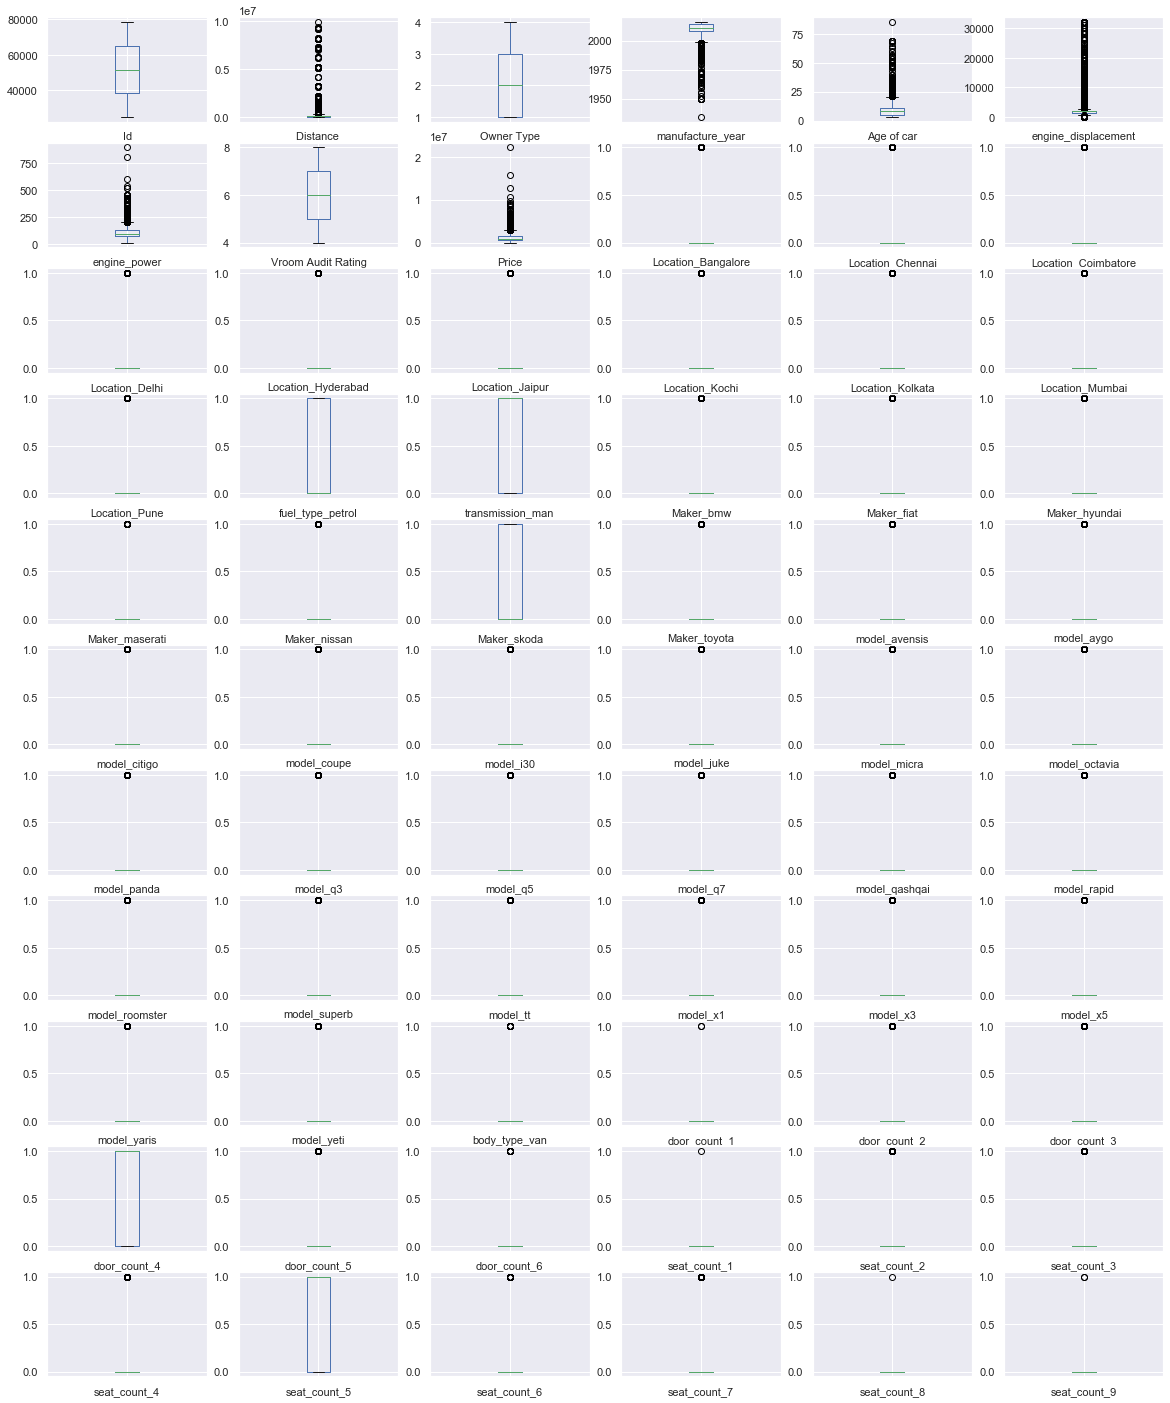

In [88]:
final_train.plot(kind= 'box' , layout=(11,6),subplots=True, sharex=False, sharey=False, figsize=(20,25))
plt.show()

**Outliers are present in the dataset but their treatment will lead to information loss, hence we dont drop or remove them.**

# Final Features Selection

As our train and test data are ready so now we have to only look for features on which we have to work.

In [89]:
final_train.columns

Index(['Id', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'fuel_type_petrol', 'transmission_man', 'Maker_bmw',
       'Maker_fiat', 'Maker_hyundai', 'Maker_maserati', 'Maker_nissan',
       'Maker_skoda', 'Maker_toyota', 'model_avensis', 'model_aygo',
       'model_citigo', 'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'body_type_van', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_

In [90]:
X = final_train.loc[:,['Id', 'Distance ', 'Owner Type', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating', 'Price',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'fuel_type_petrol', 'transmission_man', 'Maker_bmw',
       'Maker_fiat', 'Maker_hyundai', 'Maker_maserati', 'Maker_nissan',
       'Maker_skoda', 'Maker_toyota', 'model_avensis', 'model_aygo',
       'model_citigo', 'model_coupe', 'model_i30', 'model_juke', 'model_micra',
       'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7',
       'model_qashqai', 'model_rapid', 'model_roomster', 'model_superb',
       'model_tt', 'model_x1', 'model_x3', 'model_x5', 'model_yaris',
       'model_yeti', 'body_type_van', 'door_count_1', 'door_count_2',
       'door_count_3', 'door_count_4', 'door_count_5', 'door_count_6',
       'seat_count_1', 'seat_count_2', 'seat_count_3', 'seat_count_4',
       'seat_count_5', 'seat_count_6', 'seat_count_7', 'seat_count_8',
       'seat_count_9']]
X.shape

(53515, 66)

In [91]:
train_data['Price']=train_data['Price'].astype('int')
y = final_train.loc[:,['Price']]
y.head()

,Price
0,543764.25
1,401819.25
2,2392855.50
3,958606.50
4,3085561.50


In [92]:
train_data['engine_power']=train_data['engine_power'].astype('int')

In [93]:
train_data['Distance ']=train_data['Distance '].astype('int')

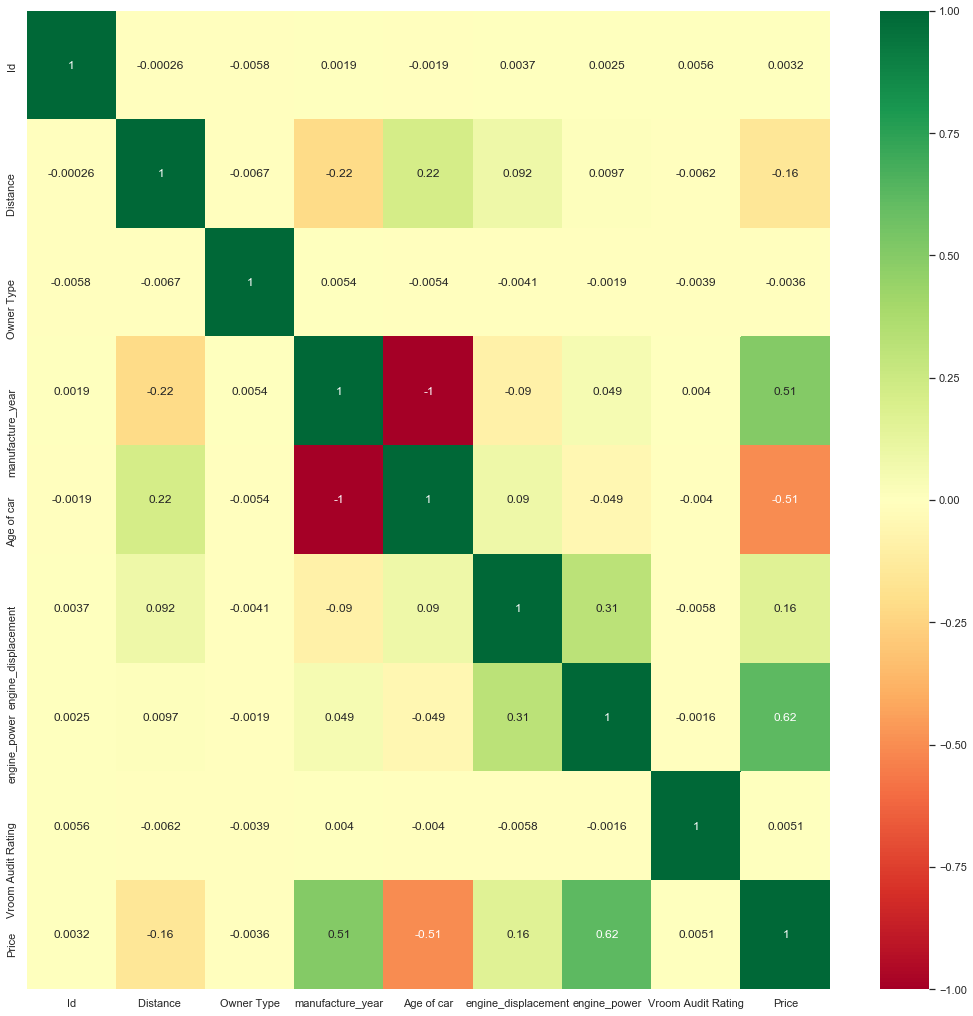

In [94]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

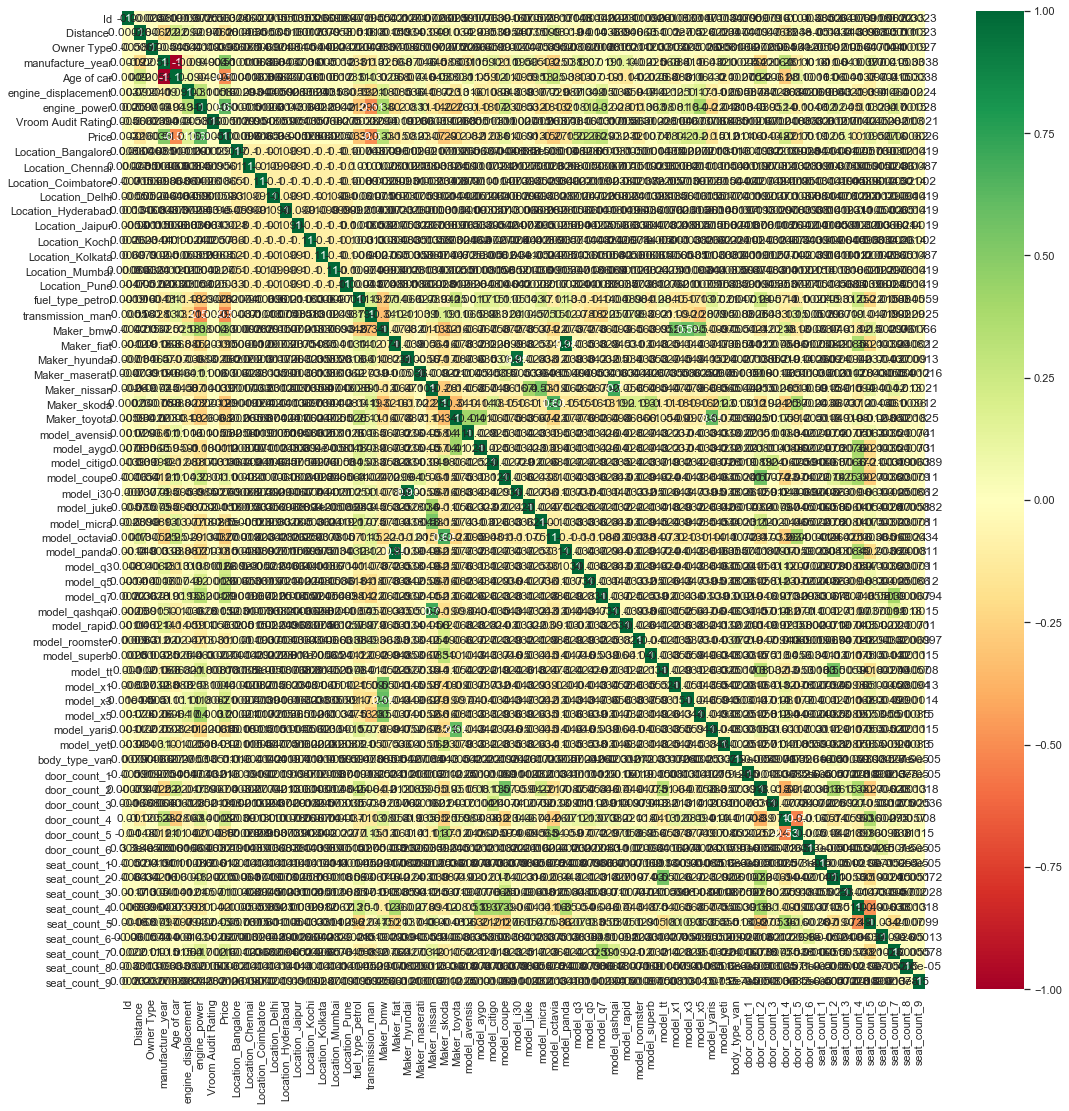

In [95]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   53515 non-null  int64 
 1   Maker                53515 non-null  object
 2   model                53515 non-null  object
 3   Location             53515 non-null  object
 4   Distance             53515 non-null  int32 
 5   Owner Type           53515 non-null  int64 
 6   manufacture_year     53515 non-null  int64 
 7   Age of car           53515 non-null  int64 
 8   engine_displacement  53515 non-null  int64 
 9   engine_power         53515 non-null  int32 
 10  body_type            53515 non-null  object
 11  Vroom Audit Rating   53515 non-null  int64 
 12  transmission         53515 non-null  object
 13  door_count           53515 non-null  object
 14  seat_count           53515 non-null  object
 15  fuel_type            53515 non-null  object
 16  Pric

### Linear Regression(Stats model)

In [97]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.127e+32
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:42:09   Log-Likelihood:             9.8725e+05
No. Observations:               53515   AIC:                        -1.974e+06
Df Residuals:                   53453   BIC:                        -1.974e+06
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.243e-14   1.64e-15     -7.584      0.000   -1.56e-14   -9.22e-15
Id                   6.395e-14    6.6e-16     96.959      0.000    6.27e-14    6.52e-14
Distance             2.888e-16    3.9e-17      7.404      0.000    2.12e-16    3.65e-16
Owner Type          -1.146e-10   9.11e-12    -12.574      0.000   -1.32e-10   -9.67e-11
manufacture_year    -2.728e-12   5.61e-14    -48.656      0.000   -2.84e-12   -2.62e-12
Age of car          -1.887e-11   3.33e-12     -5.670      0.000   -2.54e-11   -1.23e-11
engine_displacement  1.472e-13    7.5e-15     19.631      0.000    1.33e-13    1.62e-13
engine_power         2.728e-12   4.32e-13      6.319      0.000    1.88e-12    3.57e-12
Vroom Audit Rating    2.74e-11   7.18e-12      3.814      0.000    1.33e-11    4.15e-11
Price                   1.0000   2.33e-17   4.29e+16      0.000       1.000       1.000
Location_Bangalore    2.31e-10    4.8e-11      4.814      0.000    1.37e-10    3.25e-10
Location_Chennai    -1.864e-10   4.81e-11     -3.877      0.000   -2.81e-10   -9.22e-11
Location_Coimbatore   2.41e-10   4.78e-11      5.047      0.000    1.47e-10    3.35e-10
Location_Delhi        2.11e-10   4.81e-11      4.385      0.000    1.17e-10    3.05e-10
Location_Hyderabad   1.419e-10   4.82e-11      2.945      0.003    4.75e-11    2.36e-10
Location_Jaipur       2.91e-11    4.8e-11      0.606      0.544    -6.5e-11    1.23e-10
Location_Kochi       2.728e-11   4.78e-11      0.571      0.568   -6.63e-11    1.21e-10
Location_Kolkata    -7.185e-11    4.8e-11     -1.496      0.135   -1.66e-10    2.23e-11
Location_Mumbai      8.731e-11    4.8e-11      1.818      0.069   -6.84e-12    1.81e-10
Location_Pune        6.094e-11    4.8e-11      1.268      0.205   -3.32e-11    1.55e-10
fuel_type_petrol     2.383e-10   2.51e-11      9.488      0.000    1.89e-10    2.88e-10
transmission_man     4.911e-11   2.79e-11      1.763      0.078    -5.5e-12    1.04e-10
Maker_bmw           -5.866e-11   4.02e-11     -1.461      0.144   -1.37e-10    2.01e-11
Maker_fiat          -7.276e-12   2.83e-10     -0.026      0.979   -5.61e-10    5.47e-10
Maker_hyundai       -4.729e-11   1.86e-10     -0.254      0.799   -4.12e-10    3.17e-10
Maker_maserati      -5.821e-11   3.92e-10     -0.149      0.882   -8.26e-10     7.1e-10
Maker_nissan        -4.184e-11   4.45e-11     -0.941      0.347   -1.29e-10    4.53e-11
Maker_skoda          2.055e-10   4.54e-11      4.524      0.000    1.16e-10    2.95e-10
Maker_toyota        -3.638e-12   7.18e-11     -0.051      0.960   -1.44e-10    1.37e-10
model_avensis        5.639e-11   8.61e-11      0.655      0.513   -1.12e-10    2.25e-10
model_aygo          -7.276e-12   9.78e-11     -0.074      0.941   -1.99e-10    1.84e-10
model_citigo         4.547e-12   8.13e-11      0.056      0.955   -1.55e-10    1.64e-10
mod

**As, we can see from the second warning of OLS model itself that Multicollinearity is present in the dataset.
It can also be stated by noting the high conditional number.**

### Let us check for the assumptions of a linear regression model

### 1.Autocorrelation:

**Using the Test: Durbin- Watson Test,**
    
   **It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
    If the value ranges from 2-4, it is known as Negative autocorrelation.
    If the value is exactly 2, it means No Autocorrelation.**
    
**For a good linear model, it should have low or no autocorrelation.**

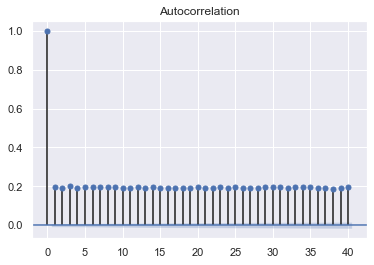

In [98]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

**we can see here the values of dublin watson test (test for normality): 1.487 (POSITIVE AUTO-CORRELATION)**

### 2.Normality of Residuals:

**For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.**

**We generally prefer a lower value of jarque bera test.**

In [99]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(163464.85226042086, 0.0)


**The critical chi square value at the 5% level of significance is 5.99.**

**If the computed value exceeds this value the null hypothesis is rejected.**

**In this case the computed value of the JB statistic 163464.8522604 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.**

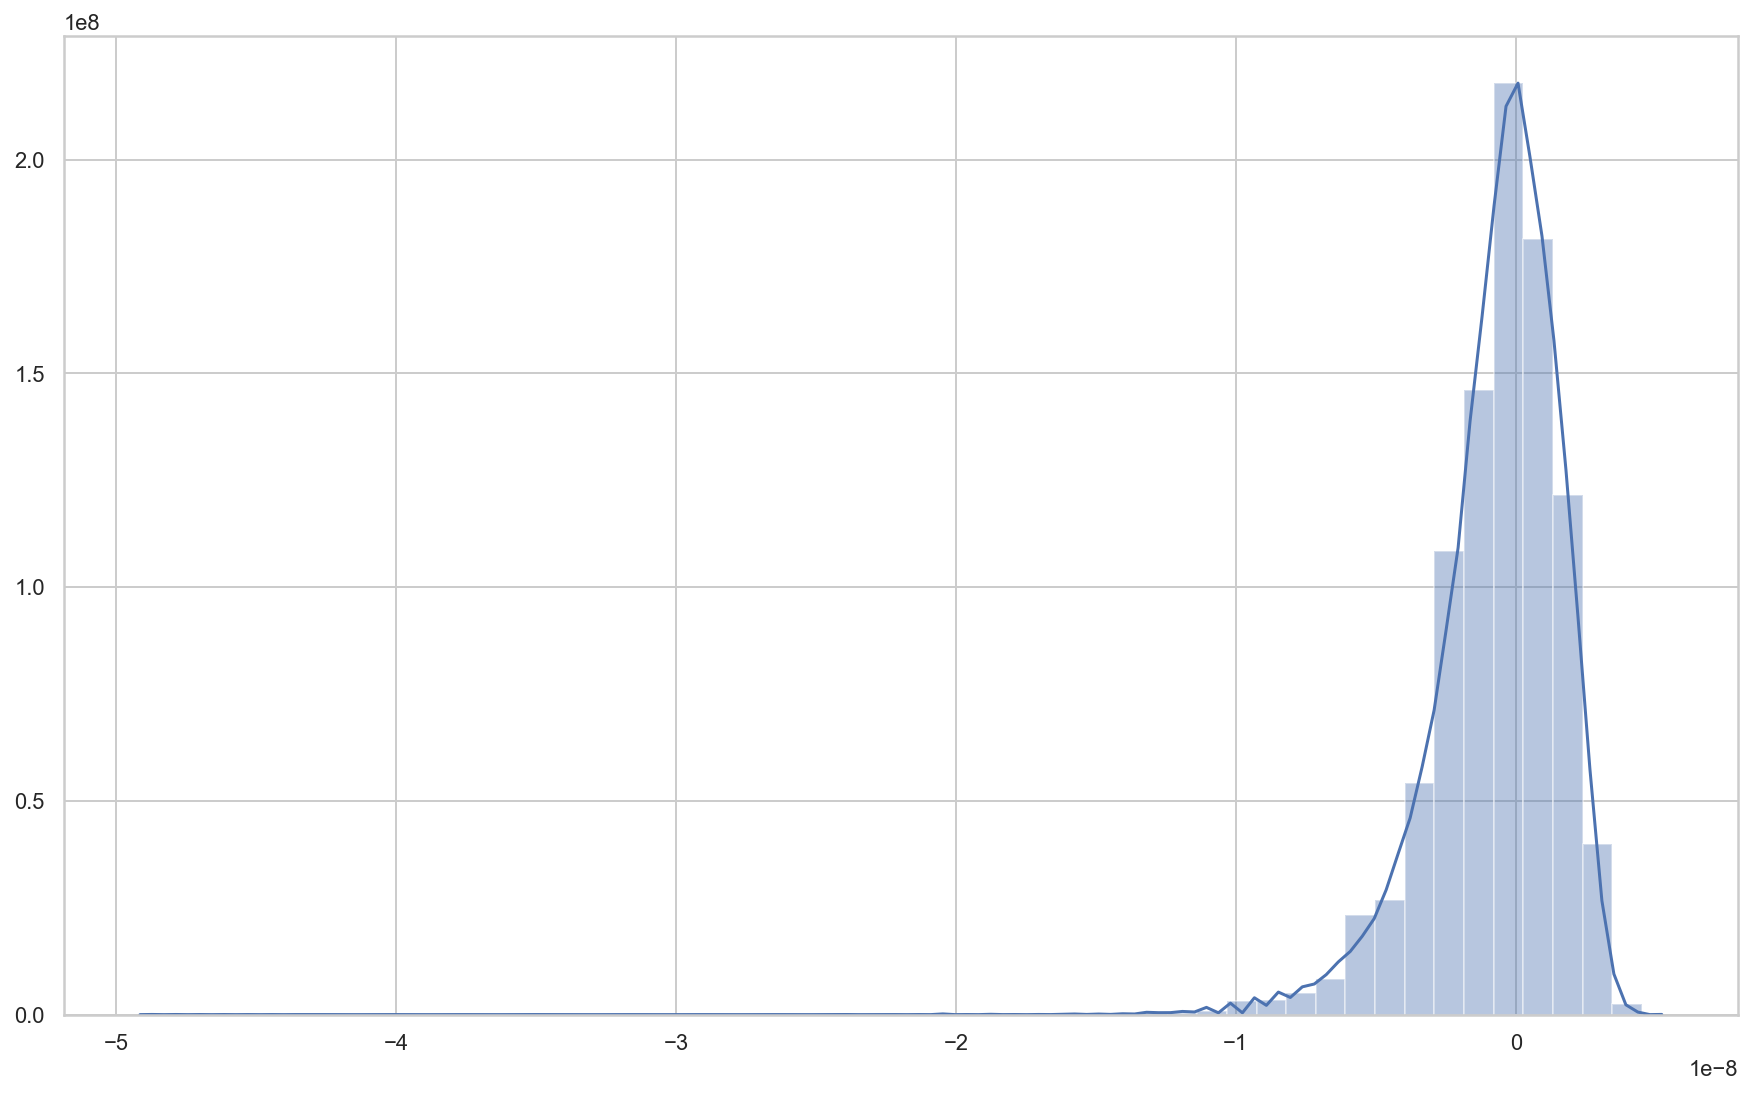

In [109]:
import seaborn as sns

sns.distplot(lin_reg.resid)

**The residuals are left skewed or not normal and hence transformation is needed**

In [134]:
sns.set(style = 'whitegrid')

final_train['predictions'] = lin_reg.predict(X_constant)
residuals = lin_reg.resid
residuals  #PREDICTED OR FITTED VALUES.

0        2.561137e-09
1        2.910383e-09
2       -1.862645e-09
3        1.280569e-09
4       -3.725290e-09
             ...     
53510   -2.793968e-09
53511   -1.047738e-09
53512   -3.958121e-09
53513   -3.492460e-09
53514   -3.492460e-09
Length: 53515, dtype: float64

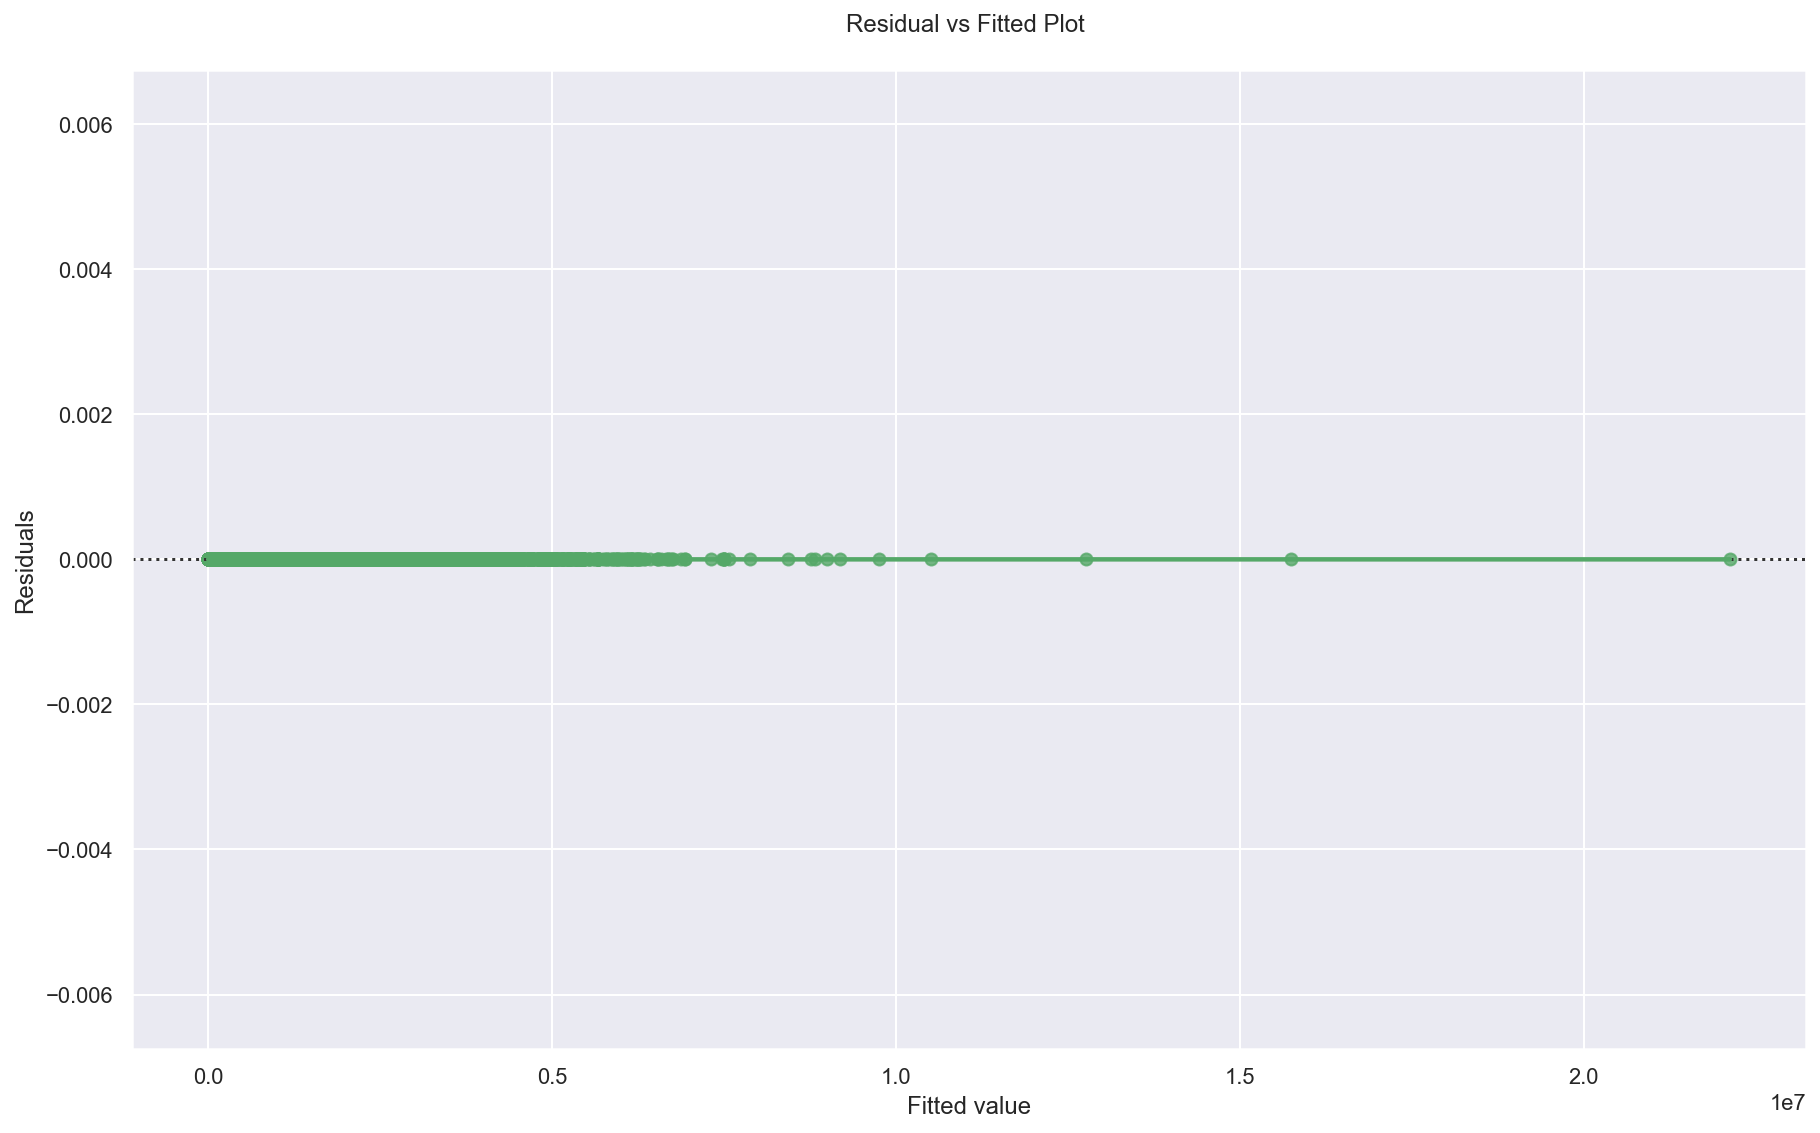

In [284]:
ax = sns.residplot(final_train.predictions, residuals, lowess = True, color = 'g')    #locallywaited scatterplot smoothing(lowess)
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

**The transformation**

**Square Transform**

In [167]:
## for sqrt(X)
df2 = final_train.copy()
final_df = final_train.transform(lambda x: x**0.5)
final_df.head()

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,158.117045,255.968748,1.414214,44.317040,7.416198,44.317040,12.124356,2.828427,737.403723,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,737.403723
1,158.120207,166.583312,1.732051,44.855323,2.645751,35.242020,7.141428,2.449490,633.892144,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,633.892144
2,158.123370,214.476106,1.732051,44.877611,2.236068,44.665423,10.246951,2.645751,1546.885742,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1546.885742
3,158.126532,209.640168,1.732051,44.844175,2.828427,40.224371,11.832160,2.645751,979.084521,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,979.084521
4,158.129694,243.975409,2.000000,44.855323,2.645751,54.708317,13.416408,2.645751,1756.576642,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1756.576642


**Apply Regression**

In [168]:
X = final_df.drop('Price',axis=1)
y = final_df.Price
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.541e+28
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        21:32:27   Log-Likelihood:             1.1853e+06
No. Observations:               53515   AIC:                        -2.371e+06
Df Residuals:                   53452   BIC:                        -2.370e+06
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.422e-10   1.31e-09      0.721      0.471   -1.62e-09     3.5e-09
Id                   -3.73e-14   7.23e-15     -5.157      0.000   -5.15e-14   -2.31e-14
Distance            -3.383e-15   2.19e-15     -1.545      0.122   -7.68e-15     9.1e-16
Owner Type           4.814e-13   6.75e-13      0.713      0.476   -8.41e-13     1.8e-12
manufacture_year    -2.123e-11   3.18e-11     -0.667      0.504   -8.36e-11    4.11e-11
Age of car          -1.929e-12   2.57e-12     -0.752      0.452   -6.96e-12     3.1e-12
engine_displacement -5.849e-15   3.35e-14     -0.175      0.861   -7.15e-14    5.98e-14
engine_power         2.345e-13   2.42e-13      0.969      0.332    -2.4e-13    7.09e-13
Vroom Audit Rating   1.084e-13   8.57e-13      0.126      0.899   -1.57e-12    1.79e-12
Location_Bangalore  -1.474e-13   1.19e-12     -0.124      0.901   -2.47e-12    2.18e-12
Location_Chennai     6.324e-13   1.19e-12      0.533      0.594    -1.7e-12    2.96e-12
Location_Coimbatore -1.954e-13   1.18e-12     -0.166      0.868   -2.51e-12    2.12e-12
Location_Delhi      -1.474e-13   1.19e-12     -0.124      0.901   -2.48e-12    2.18e-12
Location_Hyderabad  -6.928e-14   1.19e-12     -0.058      0.954    -2.4e-12    2.26e-12
Location_Jaipur     -1.315e-13   1.19e-12     -0.111      0.912   -2.46e-12    2.19e-12
Location_Kochi       1.297e-13   1.18e-12      0.110      0.912   -2.18e-12    2.44e-12
Location_Kolkata     7.105e-14   1.19e-12      0.060      0.952   -2.25e-12    2.39e-12
Location_Mumbai     -1.332e-14   1.19e-12     -0.011      0.991   -2.34e-12    2.31e-12
Location_Pune       -9.859e-14   1.19e-12     -0.083      0.934   -2.42e-12    2.23e-12
fuel_type_petrol    -1.084e-13    6.3e-13     -0.172      0.863   -1.34e-12    1.13e-12
transmission_man    -5.422e-13   6.94e-13     -0.781      0.435    -1.9e-12    8.18e-13
Maker_bmw            6.469e-11   9.47e-11      0.683      0.494   -1.21e-10     2.5e-10
Maker_fiat          -8.775e-13   7.04e-12     -0.125      0.901   -1.47e-11    1.29e-11
Maker_hyundai       -1.673e-12   4.63e-12     -0.362      0.718   -1.07e-11     7.4e-12
Maker_maserati       4.263e-14   9.67e-12      0.004      0.996   -1.89e-11     1.9e-11
Maker_nissan         6.412e-11   9.45e-11      0.678      0.498   -1.21e-10    2.49e-10
Maker_skoda          7.503e-11   1.08e-10      0.695      0.487   -1.37e-10    2.87e-10
Maker_toyota         8.527e-11   1.26e-10      0.676      0.499   -1.62e-10    3.32e-10
model_avensis        9.948e-14   2.13e-12      0.047      0.963   -4.08e-12    4.28e-12
model_aygo          -1.215e-12   2.46e-12     -0.494      0.621   -6.04e-12    3.61e-12
model_citigo         1.077e-11   1.79e-11      0.602      0.547   -2.43e-11    4.59e-11
model_coupe          9.197e-11   1.26e-10      0.730      0.465   -1.55e-10    3.39e-10
mod

**Square transform is not giving fruitful results**

**Log transform**

In [146]:
df2 = final_train.copy()
final_df = df2.transform(lambda X: np.log(X))
final_df.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,10.126671,11.090111,0.693147,7.582738,4.007333,7.582738,4.990433,2.079442,13.206271,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,13.206271
1,10.126711,10.230991,1.098612,7.606885,1.945910,7.124478,3.931826,1.791759,12.903758,-inf,...,-inf,-inf,-inf,0.0,-inf,-inf,-inf,-inf,-inf,12.903758


**Inverse Transform:**

In [148]:
df_final1 = df2.transform(lambda X: 1/X)
df_final1.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,0.00004,0.000015,0.500000,0.000509,0.018182,0.000509,0.006803,0.125000,0.000002,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,0.000002
1,0.00004,0.000036,0.333333,0.000497,0.142857,0.000805,0.019608,0.166667,0.000002,inf,...,inf,inf,inf,1.0,inf,inf,inf,inf,inf,0.000002


**The exponential transform**

In [150]:
df_final2 = df2.transform(lambda X: np.exp(X))
df_final2.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,inf,inf,7.389056,inf,7.694785e+23,inf,6.938871e+63,2980.957987,inf,1.0,...,1.0,1.0,1.0,1.00000,1.0,1.0,1.0,1.0,1.0,inf
1,inf,inf,20.085537,inf,1.096633e+03,inf,1.409349e+22,403.428793,inf,1.0,...,1.0,1.0,1.0,2.71875,1.0,1.0,1.0,1.0,1.0,inf


**Model building will not work here as because there are few infinite values after transformation.**

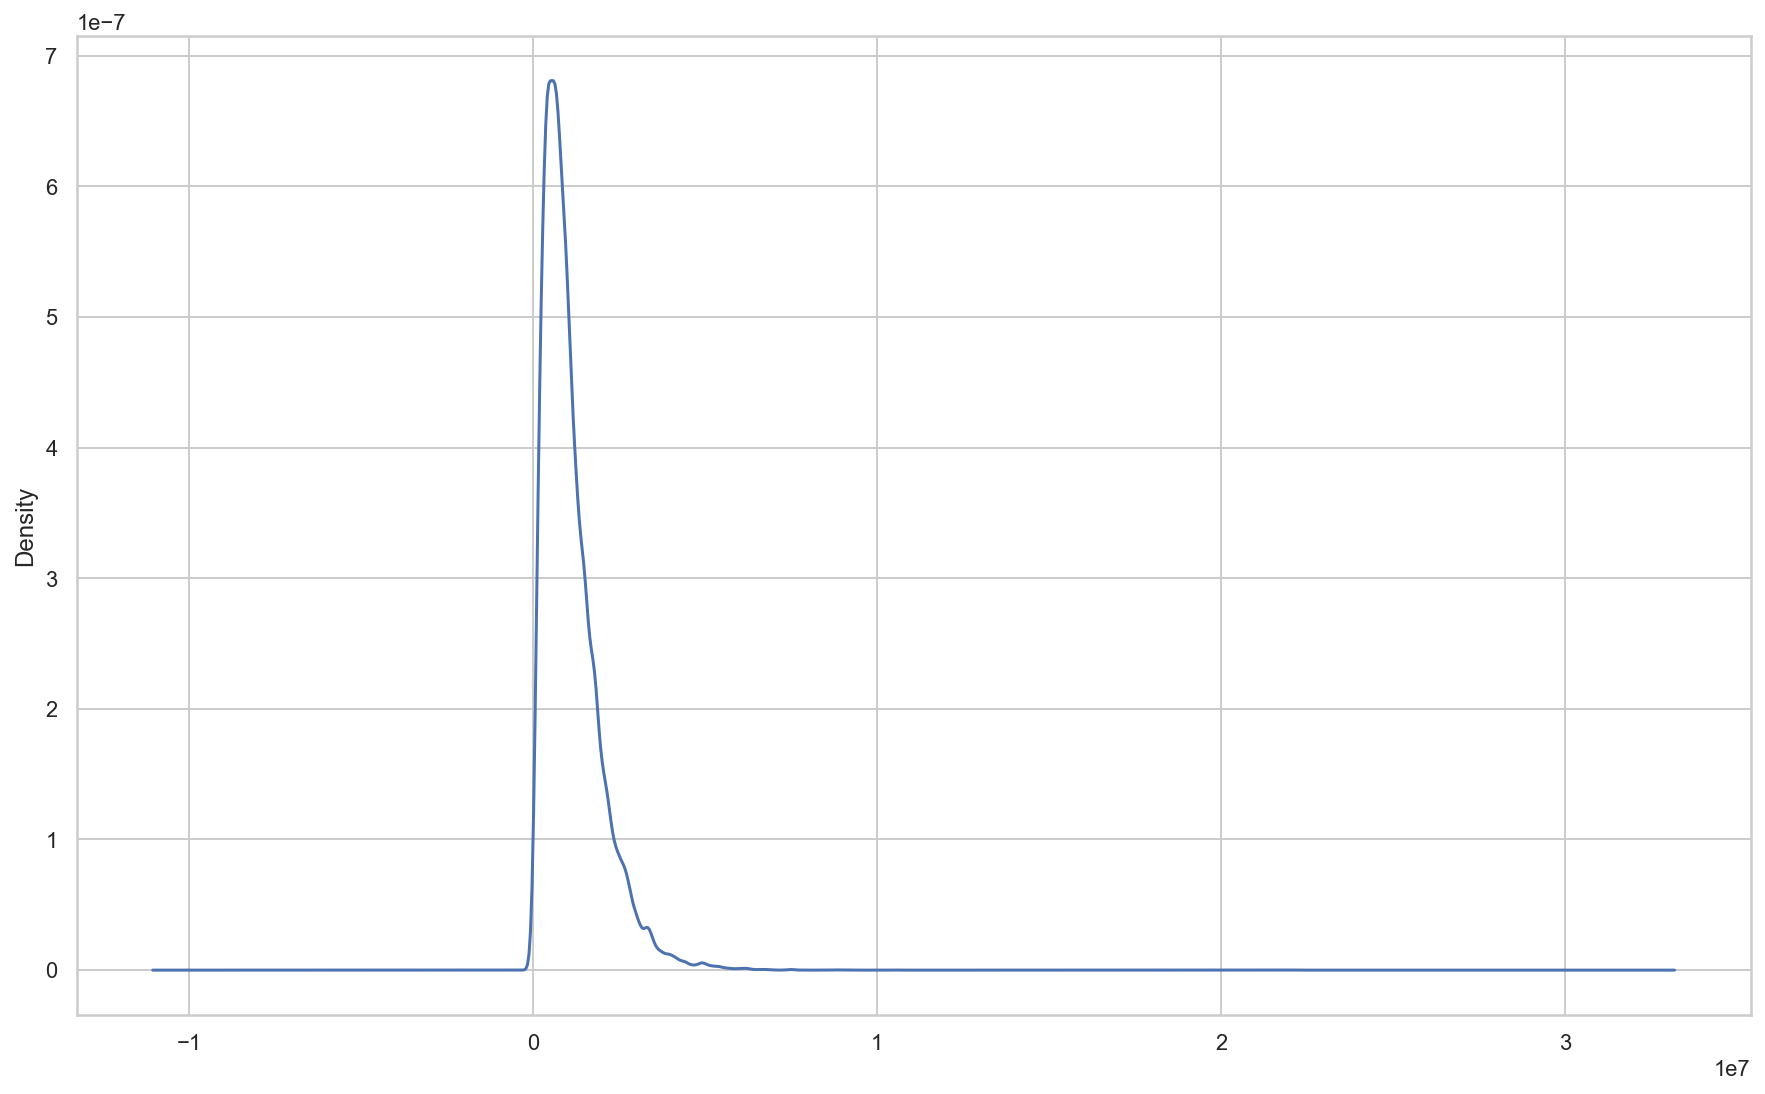

In [154]:
final_train['Price'].plot(kind='density')

In [155]:
final_train['Price1']=np.log(final_train['Price'])

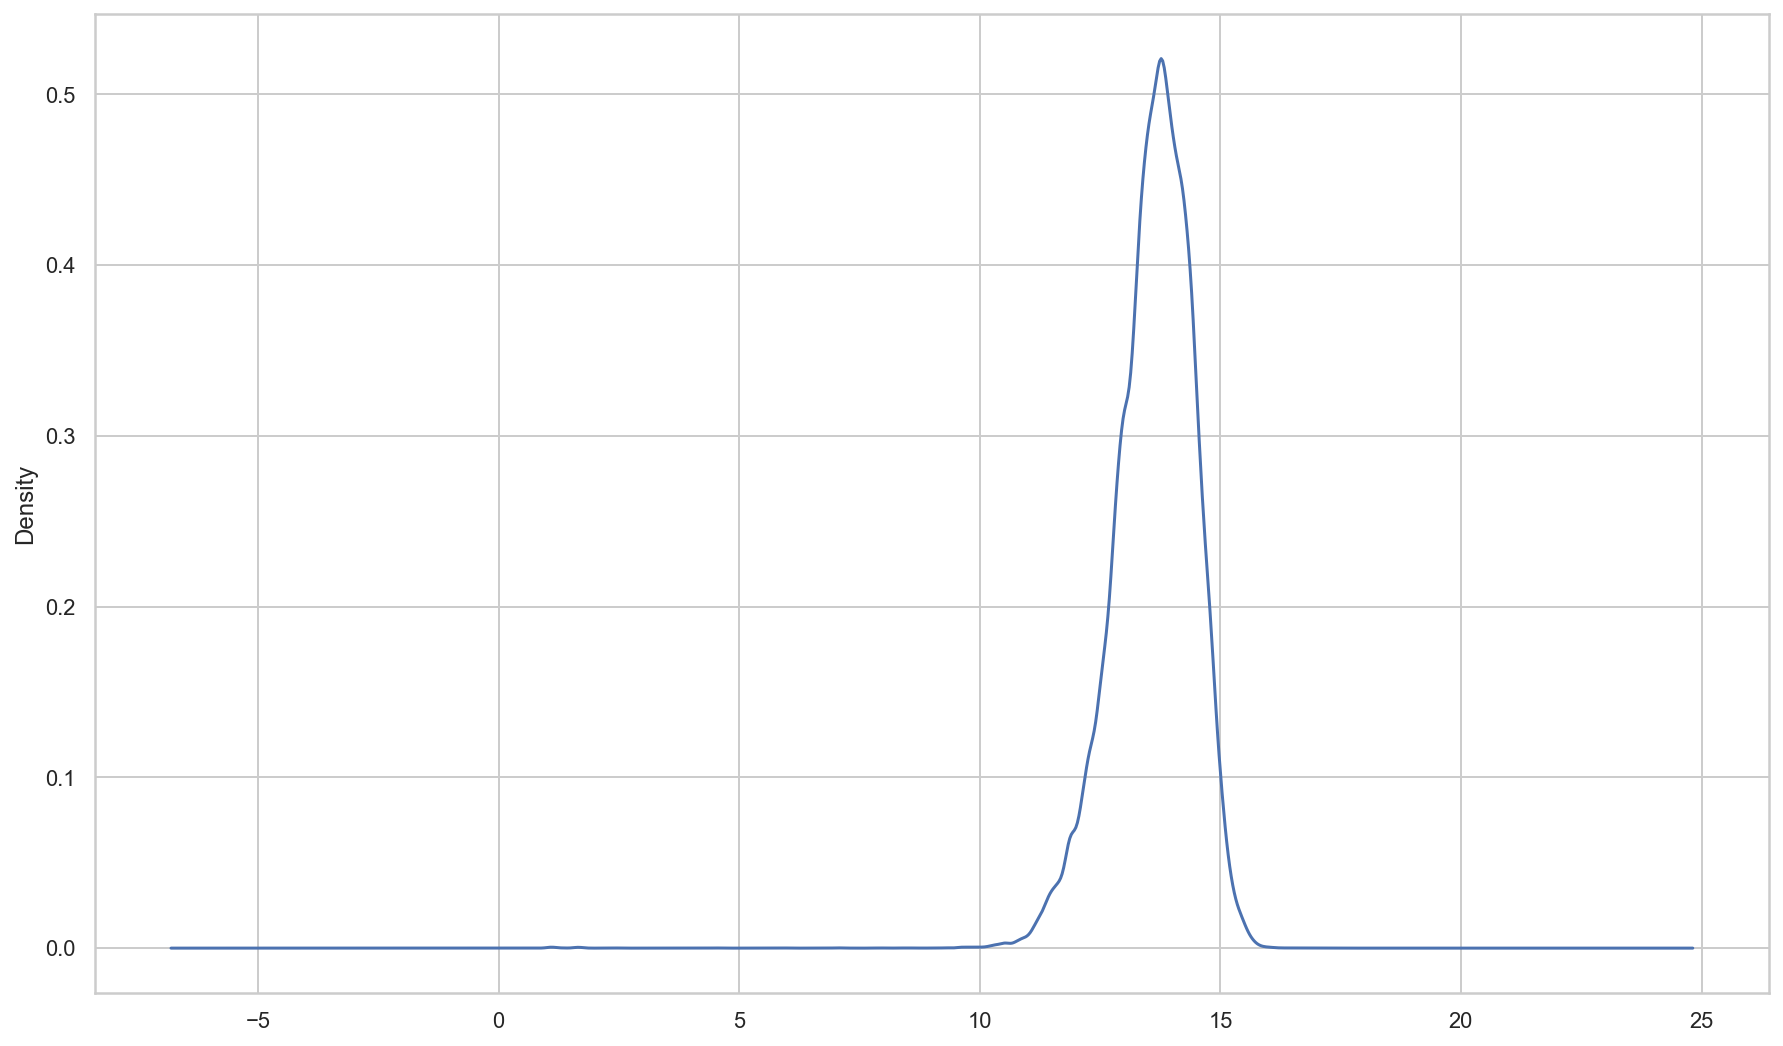

In [156]:
final_train['Price1'].plot(kind='density')

In [164]:
final_train.drop('Price1',axis=1,inplace=True)

In [165]:
final_train.head(2)

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price,Location_Bangalore,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
0,25001,65520.0,2,1964,55,1964,147.0,8,543764.25,0,...,0,0,0,0,0,0,0,0,0,543764.25
1,25002,27750.0,3,2012,7,1242,51.0,6,401819.25,0,...,0,0,0,1,0,0,0,0,0,401819.25


**Previously the distribution of the target was normal.The transformation made it worst and hence we dont transform**







### 3.Linearity of residuals:

**Rainbow test: performed to check the linearity of residuals,linearity is preffered**

In [101]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(8.373905333817975, 0.0)

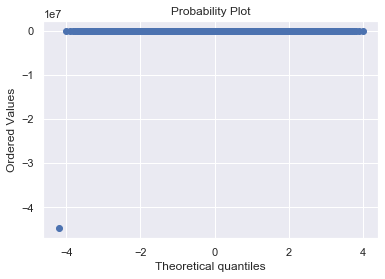

In [102]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [103]:
lin_reg.resid.mean()

-6.53094253595338e-10

**The value of mean of residuals should be equal to zero,it is negative here in this case which is close to zero, this implies that linearity is present**

### 4.Homoscedasticity_test(using goldfeld test)

[('F statistic', 0.99998892355598), ('p-value', 0.5003609413131253)]

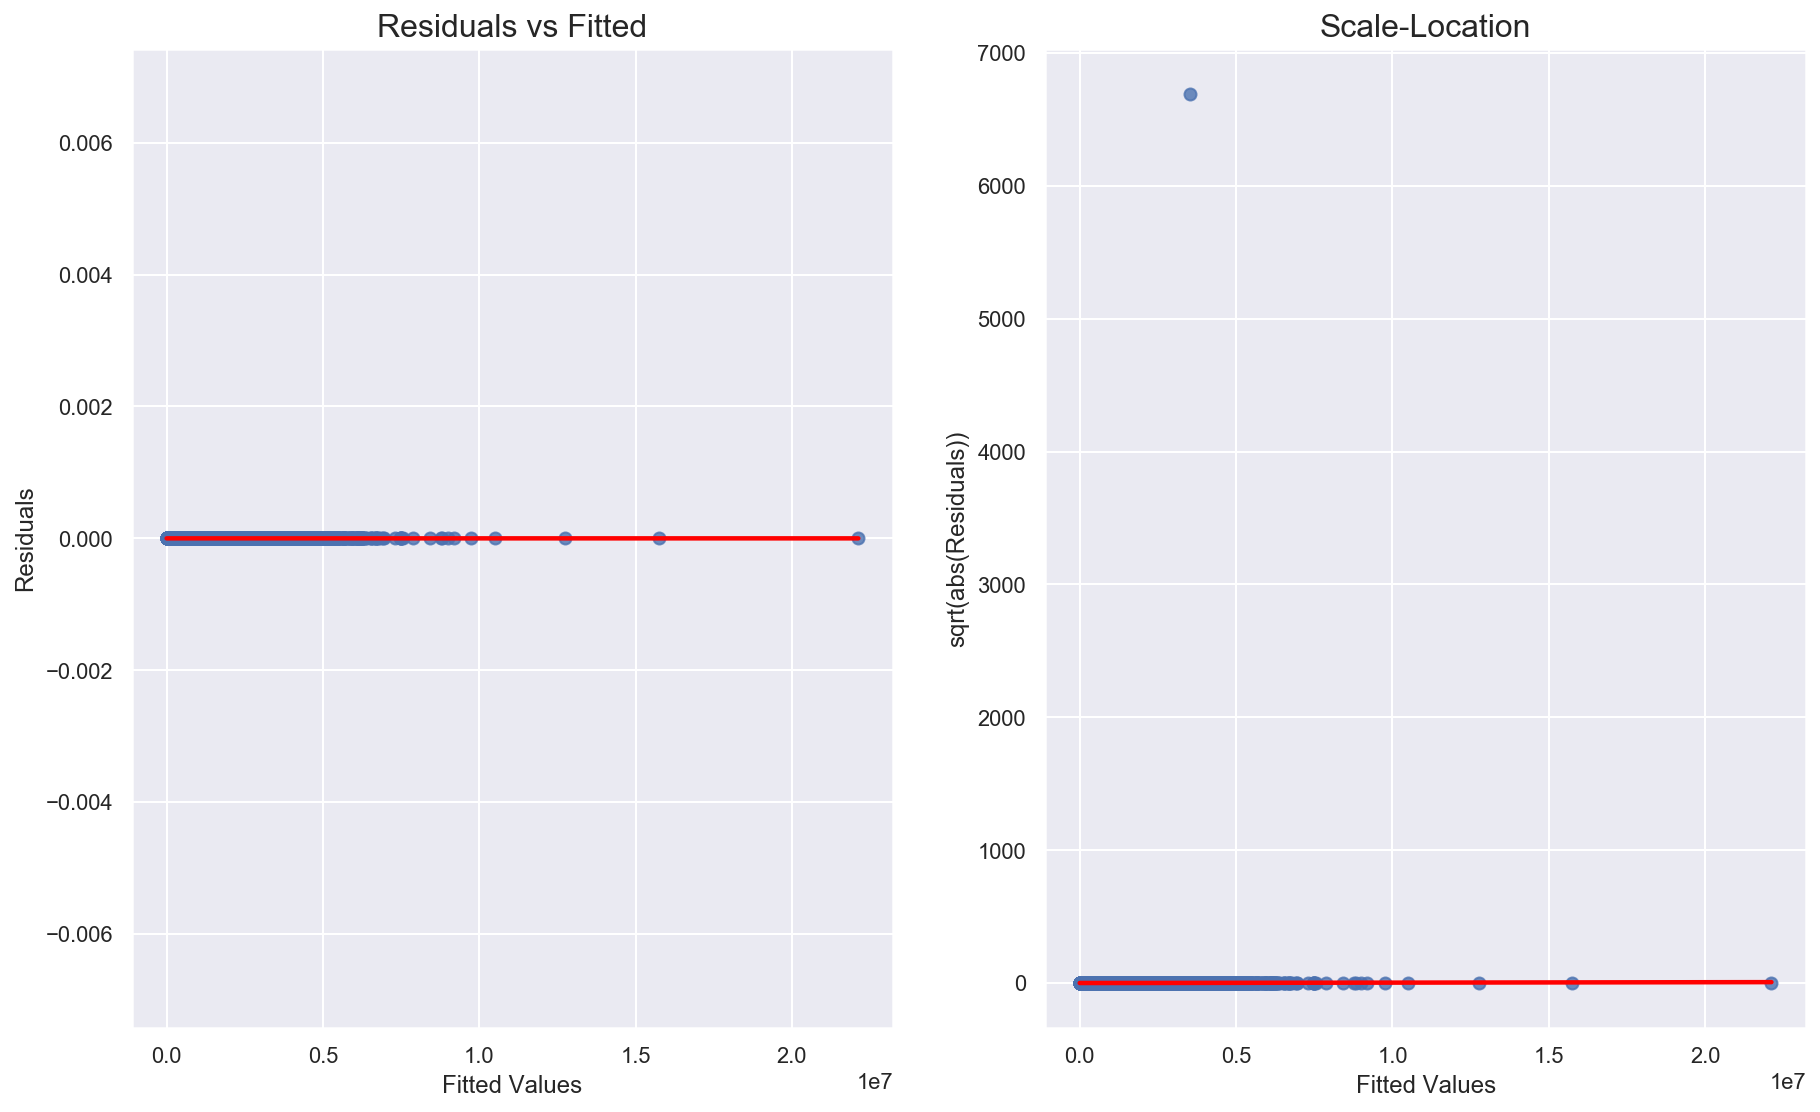

In [169]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

**Here, p value is greater than 0.05 so, it is not a  homoscedasticity distribution.**

### 5.Multicollinearity:

In [171]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Id,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Location_Bangalore,Location_Chennai,...,seat_count_1,seat_count_2,seat_count_3,seat_count_4,seat_count_5,seat_count_6,seat_count_7,seat_count_8,seat_count_9,predictions
vif,1.001257,2.44041,1.001195,43.126966,55.687875,1.705869,4.066502,1.001118,1.840037,1.832865,...,1.003867,1.821524,1.168769,3.561361,2.760332,1.035673,1.451446,1.001096,1.001538,8.644781


**The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is,compared with what it would be if that predictor were uncorrelated with the other features in the model.
If no features are correlated, then all values for VIF will be 1.**

## Backward elimination for selection of optimal features:

In [172]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const               4.709483e-01
Id                  2.513431e-07
Distance            1.224363e-01
Owner Type          4.756397e-01
manufacture_year    5.044699e-01
                        ...     
seat_count_6        9.921938e-01
seat_count_7        8.498090e-01
seat_count_8        9.828574e-01
seat_count_9        9.735617e-01
predictions         0.000000e+00
Length: 67, dtype: float64

In [173]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Id', 'Distance ', 'manufacture_year', 'Age of car', 'engine_power', 'Location_Chennai', 'transmission_man', 'Maker_bmw', 'Maker_nissan', 'Maker_toyota', 'model_aygo', 'model_coupe', 'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7', 'model_superb', 'model_tt', 'model_yeti', 'door_count_4', 'door_count_5', 'predictions']


**These are our optimal features, let us initialise X and y once again.**

In [180]:
X = final_train.loc[:,['Id', 'Distance ', 'manufacture_year', 'Age of car', 'engine_power', 'Location_Chennai', 'transmission_man', 'Maker_bmw', 'Maker_nissan', 'Maker_toyota', 'model_aygo', 'model_coupe', 'model_octavia', 'model_panda', 'model_q3', 'model_q5', 'model_q7', 'model_superb', 'model_tt', 'model_yeti', 'door_count_4', 'door_count_5', 'predictions']]
X.shape

(53515, 23)

In [181]:
train_data['Price']=train_data['Price'].astype('int')
y = final_train.loc[:,['Price']]
y.head()

,Price
0,543764.25
1,401819.25
2,2392855.50
3,958606.50
4,3085561.50


# Build it (Model)

First we are spliting the data to train and test for the model

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 25)

In [236]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### First let me try Linear Regression

In [237]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  1.0


**Applying Regularisation(Ridge) to see results:**

In [252]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [253]:
lambdas = np.linspace(1,100,100)
params = {'alpha':lambdas}              # list of alpha values to run ridge regression on 
model = Ridge(fit_intercept=True)
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35....,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100.])},
             pre_dispatch='2*n

In [254]:
ridge_model = grid_search.best_estimator_
ridge_pred = ridge_model.predict(X_test)

In [255]:
from sklearn.metrics import r2_score
r2_score(y_test,ridge_pred)

0.9999999981461639

**Lasso**

In [257]:
lambdas = np.linspace(1,10,100)
model = Lasso(fit_intercept=True)
params = {'alpha':lambdas}
grid_search = GridSearchCV(model,param_grid=params,cv=10,scoring='neg_mean_absolute_error')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.636...
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_abso

In [258]:
grid_search.best_estimator_
lasso_model = grid_search.best_estimator_
lasso_model

Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [261]:
lasso_pred = lasso_model.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,lasso_pred)

0.9999999731539682

**Ridge and lasso are giving us same results,maybe due to the nature of the dataset**

### Now I am using Random Forest Regressor and a few other models,just to see how it will behave on the data

In [263]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred1= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred1)))

Accuracy on Traing set:  0.9997508250375626
Accuracy on Testing set:  0.9996662886669198
R squared: 0.9996662886669198


In [275]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred2= dt_reg.predict(X_test)
print("Accuracy on Traing set: ",dt_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",dt_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred2)))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.999902831817063
R squared: 0.9999028318170631


In [282]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = DecisionTreeRegressor()
gb_reg.fit(X_train, y_train)
y_pred3= gb_reg.predict(X_test)
print("Accuracy on Traing set: ",gb_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",gb_reg.score(X_test,y_test))
print("R squared: {}".format(r2_score(y_true=y_test,y_pred=y_pred3)))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.9998895552097798
R squared: 0.9998895552097798


In [283]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('R Squared                : ', metrics.r2_score(y_test, y_pred3))

		Error Table
Mean Absolute Error      :  285.7191675231244
Mean Squared  Error      :  76637702.1022669
Root Mean Squared  Error :  8754.29620827779
R Squared                :  0.9998895552097798


**The RMSE result will always be larger or equal to the MAE. If all of the errors have the same magnitude, then RMSE=MAE.**

**There's not likely to be any acceptable value for any of the criteria: rmse, mse and r-squared. They are better interpreted and applied comparatively rather than absolutely.**